<font color='#315aa0'>**Velarion - Exploratory Data Analysis**</font>
---

## <font color='#b0aeae'>**Índice**</font>

1. **Descripción del Notebook**
2. **Configuraciónes**
   * Importación de librerías
   * Paths
   * Paleta de Colores del Proyecto
   * Funciones
3. **Extracción de datos**
   * Clientes
   * Transacciones
   * Interacciones con la App
   * IAPCs
4. **Exploratory Data Analysis (EDA)**
   * Perfil del cliente
   * Geografía e Inflación
   * Transacciones del cliente
   * Interacciones del cliente con la App
5. **Feature Engineering**
   * Datasets Integration
   * Variance Inflation Factor (VIF)

# <font color='#315aa0'>**Cofiguraciones**</font>

## <font color='#c37171'>**Importación de librerías**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json

import os
from typing import Callable, List, Dict, Tuple
from pathlib import Path

from IPython.display import clear_output
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## <font color='#c37171'>**Paths**</font>

In [2]:
# Obtiene el path actual
PROJECT_PATH = os.getcwd()

src = Path('src')
DATA_PATH = PROJECT_PATH / src

img = Path('img')
IMG_PATH = PROJECT_PATH / img

models = Path('models')
MODELS_PATH = PROJECT_PATH / models

reports = Path('reports')
REPORTS_PATH = PROJECT_PATH / reports

dirs = [DATA_PATH, IMG_PATH, MODELS_PATH, REPORTS_PATH]


for directory in dirs:
    if not directory.exists():
        directory.mkdir(parents=True)
        print(f'Directorio creado:\n{directory}\n')
    else:
        print(f'El directorio ya existe:\n{directory}\n')

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\src

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\img

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\models

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\reports



## <font color='#c37171'>**Paleta de Colores del Proyecto**</font>

**Bordós / Rojos**

<span style="display:inline-block; width:20px; height:20px; background:#620c0c; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#8b1f1f; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#a14b4b; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#c37171; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#e29c9c; margin-right:5px;"></span>

**Grises / Neutros**

<span style="display:inline-block; width:20px; height:20px; background:#5a5858; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#8c8a8a; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#b0aeae; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#d3d1d1; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#eae7e6; margin-right:5px;"></span>

**Azules**

<span style="display:inline-block; width:20px; height:20px; background:#0d1b3d; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#152a55; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#1e3a6c; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#274a84; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#315aa0; margin-right:5px;"></span>

**Cremas / Mostazas**

<span style="display:inline-block; width:20px; height:20px; background:#FCB53B; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDB860; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDC584; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDD2A9; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDE0CE; margin-right:5px;"></span>

In [3]:
BORDO_1, BORDO_2, BORDO_3, BORDO_4, BORDO_5 = '#620c0c', '#8b1f1f', '#a14b4b', '#c37171', '#e29c9c' 
GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = '#5a5858', '#8c8a8a', '#b0aeae', '#d3d1d1', '#eae7e6' 
AZUL_1, AZUL_2, AZUL_3, AZUL_4, AZUL_5 = '#0d1b3d', '#152a55', '#1e3a6c', '#274a84', '#315aa0' 
CREMA_1, CREMA_2, CREMA_3, CREMA_4, CREMA_5 = '#FCB53B', '#FDB860', '#FDC584', '#FDD2A9', '#FDE0CE'

## <font color='#c37171'>**Funciones**</font>

In [4]:
exited_colors = [GRIS_3, BORDO_2]

In [5]:
def boxplot_exited(df: pd.DataFrame,
                  ycol: str,
                  ylabel: str=None,
                  path='.'):
    """    
    Genera y guarda un diagrama de caja (boxplot) con la distribución de una característica numérica ('ycol')
    diferenciada según la condición de abandono ('Exited').
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos para graficar. Debe incluir las columnas 'Exited' y <'ycol'>.
    ycol : str
        Nombre de la columna numérica a visualizar.
    ylabel : str, opcional
        Etiqueta personalizada para el eje Y. Si no se especifica, se usará el nombre de 'ycol'.
    --------------------------------------------------------------------------------------------------
    Guardado
    --------
    Guarda el gráfico como imagen PNG en la ruta './<path>/' bajo el nombre 'boxplot_Exited_<ycol>.png'. 
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig: matplotlib.figure.Figure
        Objeto Figure de Matplotlib con el gráfico generado.
    """

    if ylabel is None:
        ylabel = ycol
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    ax = sns.boxplot(data=df, x='Exited', y=ycol, hue='Exited', palette=exited_colors)
    plt.title(f'Distribución {ycol} según Exited', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Exited', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(fontsize=13)
    plt.grid(True)
    
    fig.savefig(path/f'boxplot_Exited_{ycol}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')
    plt.show()
    return fig

In [6]:
def histograma_exited(df, 
                     xcol, 
                     xlabel: str=None,
                     path: Path='.'):
    """
    Genera y guarda un histograma doble con la distribución de una variable numérica ('xcol'),
    diferenciada por la condición de abandono ('Exited' = 1 y 0).
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos a graficar. Debe incluir la columna 'Exited' y la columna numérica <'xcol'>.
    xcol : str
        Nombre de la columna numérica a visualizar.
    xlabel : str, opcional
        Etiqueta personalizada para el eje X. Si no se especifica, se usará el nombre de 'xcol'.
    --------------------------------------------------------------------------------------------------
    Guardado
    --------
    Guarda el gráfico como imagen PNG en la ruta './<path>/' bajo el nombre 'hist_Churn_<xcol>.png'.
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig : matplotlib.figure.Figure
        Objeto Figure de Matplotlib con los gráficos generados.
    """

    if xlabel is None:
        xlabel = xcol
        
    fig, axes = plt.subplots(2,1, figsize=(8,6))

    sns.histplot(data=df[df['Exited'] == 0], x=xcol, bins=30, color=exited_colors[0], kde=True, ax=axes[0])
    axes[0].set_title("Exited = 0", fontsize=15, fontweight='bold', loc='left', color=GRIS_2)
    axes[0].set_xlabel(xlabel, fontsize=13)
    axes[0].set_ylabel('Frecuencia', fontsize=13)
    
    sns.histplot(data=df[df['Exited'] == 1], x=xcol, bins=30,  color=exited_colors[1], kde=True, ax=axes[1])
    axes[1].set_title("Exited = 1", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
    axes[1].set_xlabel(xlabel, fontsize=13)
    axes[1].set_ylabel('Frecuencia', fontsize=13)

    # Ajuste de los límites de los ejes
    ymax1 = axes[0].get_ylim()[1]
    ymax2 = axes[1].get_ylim()[1]

    ymax = max(ymax1, ymax2)

    axes[0].set_ylim(0, ymax)
    axes[1].set_ylim(0, ymax)

    # Configuraciones

    sns.despine()
    plt.suptitle(f'Distribución {xlabel} según Exited', fontsize=18, fontweight='bold', y=1.01)
    plt.subplots_adjust(hspace=2)
    plt.tight_layout()
    
    fig.savefig(f'{path}/hist_Extied_{xcol}.png',
                    transparent=False,
                    dpi=300,
                    bbox_inches='tight')
    
    plt.show()
    return fig


In [7]:
def bar_exited(df: pd.DataFrame,
              xcol: str,
              ycol: str='count',
              hue_col: str='Exited',
              figsize: Tuple=(6,4),
              xlabel: str=None,
              ylabel: str='Customer Count',
              rotation: float=None,
              path: Path='.'):
    
    """
    Genera y guarda un gráfico de barras agrupadas para comparar las clases de una variable categórica ('xcol'),
    diferenciadas según la condición de abandono ('Exited'), utilizando la frecuencia u otra métrica como altura.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos a graficar. Debe incluir la columna 'Exited' y la columna categórica <'xcol'>.
    xcol : str
        Columna categórica que se representa en el eje X.
    ycol : str, opcional
        Columna numérica para el eje Y. (Por defecto: 'count').
    hue_col : str, opcional
        Columna utilizada para agrupar los datos. (Por defecto: 'Exited').
    figsize : Tuple, opcional
        Tamaño de la figura en pulgadas (ancho, alto). (Por defecto: (6, 4)).
    xlabel : str, opcional
        Etiqueta del eje X. Si no se especifica, se usará el nombre de 'xcol'.
    ylabel : str, opcional
        Etiqueta del eje Y. (Por defecto: 'Customer Count').
    --------------------------------------------------------------------------------------------------
    Guardado
    --------
    Guarda el gráfico como imagen PNG en la ruta './<path>/' bajo el nombre 'bar_Churn_<xcol>.png'.
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig : matplotlib.figure.Figure
        Objeto Figure de Matplotlib con el gráfico de barras generado.
    """

    df_counts = pd.DataFrame(df_clients.groupby([xcol, hue_col])[xcol].value_counts()).reset_index()


    fig, ax = plt.subplots(figsize=figsize)
    
        
    ax = sns.barplot(data=df_counts, x=xcol, y=ycol, hue=hue_col, palette=exited_colors)
    ax.set_title(f'Exited según {xcol}', fontsize=18, fontweight='bold', pad=20)
    if xlabel is None:
        ax.set_xlabel('')
    else:
        ax.set_xlabel(xcol, fontsize=15)
        
    ax.set_ylabel(ylabel, fontsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=12, labelrotation=rotation)
    for bar in ax.patches:
        height = bar.get_height()
        if height == 0:
            continue
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, 
                    height + 30,
                    f'{height:.0f}',
                    ha='center')
            
    sns.despine()


    fig.savefig(path/f'bar_Exited_{xcol}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')

    plt.show()
    return fig


In [8]:
def pivot_and_exited_rate(df: pd.DataFrame, 
                          index_col: str):
    """
    Genera una tabla resumen con la tasa de abandono ('Exited rate') por clases de una variable categórica.

    Transforma un DataFrame con las columnas 'Exited' y 'count' en una tabla dinámica donde cada fila
    representa una categoría de 'index_col', con columnas separadas para cada valor de 'Exited'.
    Calcula la tasa de abandono y ordena los resultados en orden descendente.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame con las columnas 'Exited' y 'count', que además contiene la variable categórica indicada
        en 'index_col'.
    index_col : str
        Nombre de la columna categórica que se utiliza como índice.
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    df : pd.DataFrame
        DataFrame con las columnas:
        - 'index_col': variable categórica evaluada
        - 'No Exited': cantidad de clientes que no cancelaron sus servicios
        - 'Exited': cantidad de clientes que cancelaron sus servicios
        - 'Exit Rate (%)': tasa de abandono para cada clase
    """
    
    df = df.pivot(index=index_col, columns='Exited', values='count')
    df.columns = ['No Exited', 'Exited']
    df = df.reset_index()
    df['Exit Rate (%)'] = round(df['Exited'] / (df['Exited'] + df['No Exited']) * 100, 2)
    df = df.sort_values(by='Exit Rate (%)', ascending=False)
    return df

In [9]:
def plot_exited_rate_table(df: pd.DataFrame,
                          col: str,
                          rate_col: str='Exit Rate (%)',
                          figsize: Tuple=(6,3),
                          save_as: str=None,
                          path: Path='.'):

    """
    Genera una tabla visual (usando Matplotlib) para mostrar la tasa de abandono ('Exit Rate') 
    por clases de una variable categórica.

    La función construye una tabla gráfica basada en una columna categórica ('col') y su respectiva 
    tasa de abandono, resaltando en rojo la clase con la tasa más alta.
    Luego, la tabla se exporta automáticamente como una imagen PNG.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene 'col' y una columna con la tasa de abandono. (Por defecto: 'Exit Rate (%)').
    col : str
        Nombre de la variable categórica cuyas clases se mostrarán en la tabla.
    rate_col : str, opcional
        Nombre de la columna que contiene los valores de la tasa de abandono. (Por defecto: 'Exit Rate (%)').
    figsize : Tuple, opcional
        Tamaño de la figura en pulgadas (ancho, alto). (Por defecto: (6, 3)).
    save_as: str, opcional
        Nombre con el que se guardará la figura. (Por defecto: el nombre de 'col').
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig : matplotlib.figure.Figure
        Objeto Figure de Matplotlib con la tabla renderizada.
    """

    if rate_col != 'Exit Rate (%)':
        label = rate_col
    else:
        label = 'Exit Rate (%)'
    
    data = df[[col, rate_col]].values.tolist()

    if save_as is None:
        save_as = col

    # Crear tabla para exportar como imagen
    fig, ax = plt.subplots(figsize=figsize)
    # Eliminar ejes
    ax.axis('off')
    
    color_order = []
    max_rate = max(data, key=lambda x: x[1])
    idx_max = data.index(max_rate)
    
    for i in range(len(df)):
        if i == idx_max:
            color_order.append('tomato')
        else:
            color_order.append('silver')
            
    cell_colors = [[color, color] for color in color_order]

    tabla = ax.table(cellText=data,
                     colLabels=[col, label],
                     cellLoc='center',
                     loc='center',
                     colColours=['gray' for i in range(len(data[0]))],
                     cellColours=cell_colors)
    
    plt.title(f'Exit Rate (%) según {col}', fontsize=18, fontweight='bold', pad=20)
    
    # Escalar la tabla para una mejor legibilidad
    tabla.scale(1, 2)
    
    plt.tight_layout()
    
    fig.savefig(path/f'exit_rate_{save_as}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')
    
    
    plt.show()
    return fig

In [10]:
def barh_stack_exited(df: pd.DataFrame,
                     ycol: str,
                     figsize: Tuple=(8,3),
                     path: Path='.'):

    """
    Genera un gráfico de barras horizontales apiladas para mostrar la distribución de clientes 
    según una variable categórica y la condición de abandono ('Exited').
    (Utilizar la función pivot_and_exited_rate sobre el DataFrame antes de usar esta función)

    Este gráfico muestra la composición de cada clase de 'ycol' según la condición de abandono.
    La figura se guarda automáticamente como imagen PNG.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        El DataFrame debe contener las columnas 'No Exited', 'Exited' y la columna categórica '<ycol>'.
    ycol : str
        Nombre de la columna categórica utilizada en el eje Y.
    figsize : Tuple, opcional
        Tamaño de la figura en pulgadas (ancho, alto). (Por defecto: (8, 3)).
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig: matplotlib.figure.Figure
        Objeto Figure de Matplotlib.
    """

        
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.set_frame_on(False)

    df['Total'] = df['No Exited'] + df['Exited']
    df.sort_values(by='Total', inplace=True)
    # Barras horizontales
    ax.barh(df[ycol], df['No Exited'], label='No Exited', color=exited_colors[0])
    ax.barh(df[ycol], df['Exited'], left=df['No Exited'], label='Exited', color=exited_colors[1])
    
    for idx, row in df.iterrows():
        tipo = row[ycol]
        
        # Etiqueta para "No Exited"
        no_exited = row['No Exited'] / 2
        ax.text(no_exited, tipo, str(row['No Exited']), va='center', ha='center', color='black', fontsize=9)
        
        # Etiqueta para "Exited"
        exited = row['No Exited'] + row['Exited'] / 2
        ax.text(exited, tipo, str(row['Exited']), va='center', ha='center', color='black', fontsize=9)
    
    # Título y etiquetas
    ax.set_title(f'Exited by {ycol}', fontsize=18, loc='left', fontweight='bold', pad=20)
    ax.xaxis.set_visible(False)
    ax.tick_params(size=0, labelsize=10)
    ax.legend()
    sns.despine()
    
    plt.tight_layout()
    
    fig.savefig(path/f'barhstk_Exited_{ycol}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')
    
    plt.show()
    return fig

In [11]:
def kde_density_exited(df: pd.DataFrame,
                        xcol: str='date',
                        ycol: str=None,
                        figsize: Tuple=(9,6),
                        title: str=None,
                        path: Path='.'):
    
    """
    Genera y guarda un gráfico de densidad de kernel (KDE) para visualizar la distribución 
    de una o dos variables según la condición de abandono ('Exited').
    
    El gráfico muestra las curvas de densidad sombreadas para los clientes que
    abandonaron el servicio y los que no. Es ideal para analizar cómo las variables
    continuas se distribuyen en ambos grupos.

    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos a graficar. Debe incluir las columnas 'Exited', 
        '<xcol>' y opcionalmente '<ycol>'.
    xcol : str, opcional
        Nombre de la columna numérica o de fecha para el eje X. (Por defecto: 'date').
    ycol : str, opcional
        Nombre de la columna numérica para el eje Y. Si se especifica, el gráfico 
        será de densidad 2D. (Por defecto: None).
    figsize : Tuple, opcional
        Tamaño de la figura en pulgadas (ancho, alto). (Por defecto: (9, 6)).
    title : str, opcional
        Título personalizado para el gráfico. Si no se especifica, el título se 
        generará automáticamente a partir de 'ycol'. (Por defecto: None).
    path : Path, opcional
        Ruta donde se guardará la imagen. (Por defecto: '.').

    --------------------------------------------------------------------------------------------------
    Guardado
    --------
    Guarda el gráfico como imagen PNG en la ruta './<path>/' bajo el nombre
    'sessions_density_sampled.png'.

    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    None
        Esta función no retorna ningún valor explícito.
    """

    if title is None:
        title = ycol
    
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.kdeplot(
        data=df,
        x=xcol,
        hue='Exited',
        fill=True,
        common_norm=False,
        palette=exited_colors,
        alpha=0.5,
        linewidth=2,
        ax=ax
    )
    
    plt.title(f'Densidad de {title} en el tiempo según Exited', fontsize=18, fontweight='bold')
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Densidad', fontsize=16)
    plt.xticks(rotation=45)
    
    sns.despine()
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    plt.savefig(path / f'{title}_density_sampled.png', dpi=300)
    plt.show()
    return fig

# <font color='#315aa0'>**Extracción de Datos**</font>

In [12]:
clients = Path('clients.parquet')
tx = Path('transactions.parquet')
ss = Path('app_sessions.parquet')
iapc = Path('IAPCs.parquet')

In [13]:
df_clients = pd.read_parquet(DATA_PATH / clients)
df_tx = pd.read_parquet(DATA_PATH / tx)
df_ss = pd.read_parquet(DATA_PATH / ss)
df_inflation = pd.read_parquet(DATA_PATH / iapc)

## <font color='#c37171'>**Exploración de Datasets**</font>

### <font color='#FCB53B'>**Clientes**</font>

In [14]:
df_clients.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_label,vulnerability_tier,vulnerability_score
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-08-15,Clientes potenciales,Medium,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaT,Standard,Medium,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-27,VIP,Medium,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Nuevos - Poco Valor,Medium,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Standard,Medium,2


In [15]:
df_clients.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

In [16]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerId           9640 non-null   int64         
 1   CreditScore          9640 non-null   int64         
 2   Geography            9640 non-null   object        
 3   Gender               9640 non-null   object        
 4   Age                  9640 non-null   int64         
 5   Tenure               9640 non-null   int64         
 6   Balance              9640 non-null   float64       
 7   NumOfProducts        9640 non-null   int64         
 8   HasCrCard            9640 non-null   int64         
 9   IsActiveMember       9640 non-null   int64         
 10  EstimatedSalary      9640 non-null   float64       
 11  Exited               9640 non-null   int64         
 12  ExitDate             1956 non-null   datetime64[ns]
 13  cluster_label        9640 non-nul

In [17]:
df_clients['CustomerId'] = df_clients['CustomerId'].astype(str)

In [18]:
df_clients['Exited'].sum()

1956

In [19]:
categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember',
                   'cluster_label', 'vulnerability_tier','vulnerability_score']

print('\n==============================')
print('     VARIABLES CATEGÓRICAS')
print('==============================')
for col in categorical:
    print(f'\n{col} unique values:\n{df_clients[col].unique()}')


     VARIABLES CATEGÓRICAS

Geography unique values:
['France' 'Spain' 'Germany']

Gender unique values:
['Female' 'Male']

HasCrCard unique values:
[1 0]

IsActiveMember unique values:
[1 0]

cluster_label unique values:
['Clientes potenciales' 'Standard' 'VIP' 'Nuevos - Poco Valor'
 'Valioso - Bajo compromiso']

vulnerability_tier unique values:
['Medium', 'High', 'Low']
Categories (3, object): ['High' < 'Medium' < 'Low']

vulnerability_score unique values:
[2 3 1]


In [20]:
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance',
                   'NumOfProducts', 'EstimatedSalary']

df_clients[numerical].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000
mean,650.345954,38.913589,5.200000,76354.048485,1.533402,99988.817050
std,96.698852,10.493315,2.775525,62403.561539,0.583450,57529.413729
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,583.000000,32.000000,3.000000,0.000000,1.000000,50910.677500
50%,652.000000,37.000000,5.000000,97029.715000,1.000000,99923.060000
75%,717.000000,44.000000,8.000000,127547.382500,2.000000,149291.972500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


### <font color='#FCB53B'>**Transacciones**</font>

In [21]:
df_tx.head()

,date,CustomerId,type,amount,amount_label,type_freq,frequency_label,amount_score,freq_score,tran_score,tran_score_cont,tran_label,max_tx_cap,amount_clipped,amount_ratio,amount_scaled
0,2023-09-19,15655875,PAYMENT,8257.47,Medium,0.338146,Medium,2,2,4,2.000009,Medium,134030.093330,8257.47,0.004833,647.78
1,2023-09-19,15598157,CASH_OUT,331272.67,High,0.351663,High,3,3,6,3.000358,VIP,128226.268238,331272.67,0.204777,26257.78
2,2023-09-19,15655952,CASH_OUT,27022.10,Low,0.351663,High,1,3,4,1.600029,Low,129532.422072,27022.10,0.016448,2130.58
3,2023-09-19,15588839,TRANSFER,450253.66,Medium,0.083756,Low,2,1,3,1.700487,Low,72727.328499,450253.66,0.278425,20249.12
4,2023-09-19,15761364,CASH_OUT,167934.14,Medium,0.351663,High,2,3,5,2.300182,High,136572.336725,167934.14,0.103672,14158.68


In [22]:
df_tx.drop(['amount', 'amount_label', 'type_freq', 'frequency_label', 'amount_score',
            'freq_score', 'tran_score', 'tran_score_cont', 'tran_label', 'max_tx_cap',
            'amount_clipped', 'amount_ratio'],axis=1, inplace=True)

In [23]:
df_tx = df_tx.rename(columns={'amount_scaled': 'amount'})

In [24]:
df_tx.head()

,date,CustomerId,type,amount
0,2023-09-19,15655875,PAYMENT,647.78
1,2023-09-19,15598157,CASH_OUT,26257.78
2,2023-09-19,15655952,CASH_OUT,2130.58
3,2023-09-19,15588839,TRANSFER,20249.12
4,2023-09-19,15761364,CASH_OUT,14158.68


In [25]:
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   CustomerId  int32         
 2   type        object        
 3   amount      float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 169.9+ MB


In [26]:
df_tx['CustomerId'] = df_tx['CustomerId'].astype(str)

In [27]:
df_tx.describe()

,date,amount
count,6362620,6.362620e+06
mean,2024-11-03 14:49:12.721741312,1.231947e+04
min,2023-09-19 00:00:00,1.000000e+00
25%,2024-05-15 00:00:00,9.945500e+02
50%,2024-11-23 00:00:00,5.677550e+03
75%,2025-05-06 00:00:00,1.632996e+04
max,2025-09-30 00:00:00,1.399947e+05
std,NaN,1.940099e+04


In [28]:
df_tx['type'].unique()

array(['PAYMENT', 'CASH_OUT', 'TRANSFER', 'CASH_IN', 'DEBIT'],
      dtype=object)

In [29]:
df_tx['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [30]:
df_tx['type'].value_counts(normalize=True)

type
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: proportion, dtype: float64

### <font color='#FCB53B'>**Interacción con la App**</font>

In [31]:
df_ss.head()

,session_id,CustomerId,cluster_label,date,duration_min,used_transfer,used_payment,used_invest,opened_push,failed_login,month
0,0,15634602,Clientes potenciales,2023-09-23,8.608551,0,0,0,0,0,2023-09-01
1,1,15634602,Clientes potenciales,2023-10-04,17.653699,0,0,0,1,0,2023-10-01
2,2,15634602,Clientes potenciales,2023-11-05,7.563135,0,0,0,0,0,2023-11-01
3,3,15634602,Clientes potenciales,2023-11-21,13.877477,0,0,0,0,1,2023-11-01
4,4,15634602,Clientes potenciales,2023-12-29,4.932220,0,0,0,0,0,2023-12-01


In [32]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046601 entries, 0 to 1046600
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   session_id     1046601 non-null  object        
 1   CustomerId     1046601 non-null  int64         
 2   cluster_label  1046601 non-null  object        
 3   date           1046601 non-null  datetime64[ns]
 4   duration_min   1046601 non-null  float64       
 5   used_transfer  1046601 non-null  int32         
 6   used_payment   1046601 non-null  int32         
 7   used_invest    1046601 non-null  int32         
 8   opened_push    1046601 non-null  int32         
 9   failed_login   1046601 non-null  int32         
 10  month          1046601 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(5), int64(1), object(2)
memory usage: 67.9+ MB


In [33]:
df_ss['CustomerId'] = df_ss['CustomerId'].astype(str)

In [34]:
df_ss = df_ss.sort_values(by='date')

In [35]:
df_ss.describe()

,date,duration_min,used_transfer,used_payment,used_invest,opened_push,failed_login,month
count,1046601,1.046601e+06,1.046601e+06,1.046601e+06,1.046601e+06,1.046601e+06,1.046601e+06,1046601
mean,2024-09-03 20:09:34.197043200,1.943225e+01,1.192384e-01,1.178338e-01,5.372726e-02,1.873665e-01,2.078347e-02,2024-08-20 02:46:26.843123200
min,2023-09-01 00:00:00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2023-09-01 00:00:00
25%,2024-02-29 00:00:00,7.657142e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-02-01 00:00:00
50%,2024-09-02 00:00:00,1.329781e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-09-01 00:00:00
75%,2025-03-04 00:00:00,2.354400e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2025-03-01 00:00:00
max,2025-09-30 00:00:00,1.800000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2025-09-01 00:00:00
std,NaN,2.008083e+01,3.240689e-01,3.224114e-01,2.254788e-01,3.902057e-01,1.426588e-01,NaN


**BOOLEAN COLS:**

* used_transfer	
* used_payment	
* used_invest	
* opened_push	
* failed_login

### <font color='#FCB53B'>**IAPC**</font>

In [36]:
df_inflation.head()

,month_date,inflation_rate,Geography
0,2023-01-31,0.070,France
1,2023-02-28,0.073,France
2,2023-03-31,0.067,France
3,2023-04-30,0.069,France
4,2023-05-31,0.060,France


In [37]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month_date      99 non-null     datetime64[ns]
 1   inflation_rate  99 non-null     float64       
 2   Geography       99 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.4+ KB


In [38]:
df_inflation.describe()

,month_date,inflation_rate
count,99,99.000000
mean,2024-05-30 20:21:49.090909184,0.034283
min,2023-01-31 00:00:00,0.016000
25%,2023-09-30 00:00:00,0.022000
50%,2024-05-31 00:00:00,0.027000
75%,2025-01-31 00:00:00,0.038000
max,2025-09-30 00:00:00,0.093000
std,NaN,0.017823


# <font color='#315aa0'>**Exploratory Data Analysis (EDA)**</font>

#### <font color='#e29c9c'>**Perfil del Cliente**</font>


1. ¿Existe algún **rango de edad** con una tasa de abandono significativamente mayor?
2. Los clientes que abandonan, ¿tienden a ser **nuevos o clientes antiguos**?
3. El **género** está asociado a mayores niveles de Churn?
4. Está el **puntaje crediticio *(Credit Score)*** asociado al abandono de clientes?

---

#### <font color='#e29c9c'>**Geografía e Inflación**</font>

5. ¿Algún **país** presenta un nivel más alto de abandono?
6. ¿Está relacionado el abandono con la **inflación del país**?
---

#### <font color='#e29c9c'>**Transacciones del cliente**</font>

7. Los clientes que abandonan, ¿presentan algún comportamiento similar en el **volumen de transacciones** antes de irse?  
8. ¿Difieren los **montos de las transacciones** de acuerdo a la condición de abandono?
9. ¿Difiere el **volumen de transacciones** de acuerdo a la condición de abandono? 

---

#### <font color='#e29c9c'>**Interacciones del cliente con la App**</font>

10. Los clientes que abandonan, ¿muestran algún patrón particular en la **frecuencia de inicio de sesiones**? 
11. Los clientes que abandonan cuentan con mayor cantidad de **inicios de sesión fallidos**?  
12. La cantidad de **tiempo que un cliente utiliza la app**, ¿es un factor asociado al abanodno?  

---

## <font color='#c37171'>**Perfil del cliente**</font>

### <font color='#FCB53B'>**1. ¿Existe algún rango de edad con una tasa de abandono significativamente mayor?**</font>

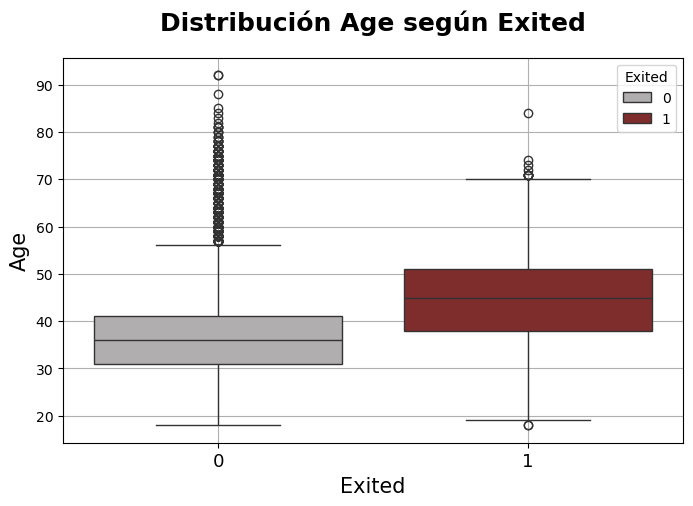

In [39]:
boxplot_edad = boxplot_exited(df=df_clients,
                              ycol='Age',
                              path=IMG_PATH)

In [40]:
df_clients[df_clients['Exited'] == 1]['Age'].describe()

count    1956.000000
mean       44.877301
std         9.807262
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

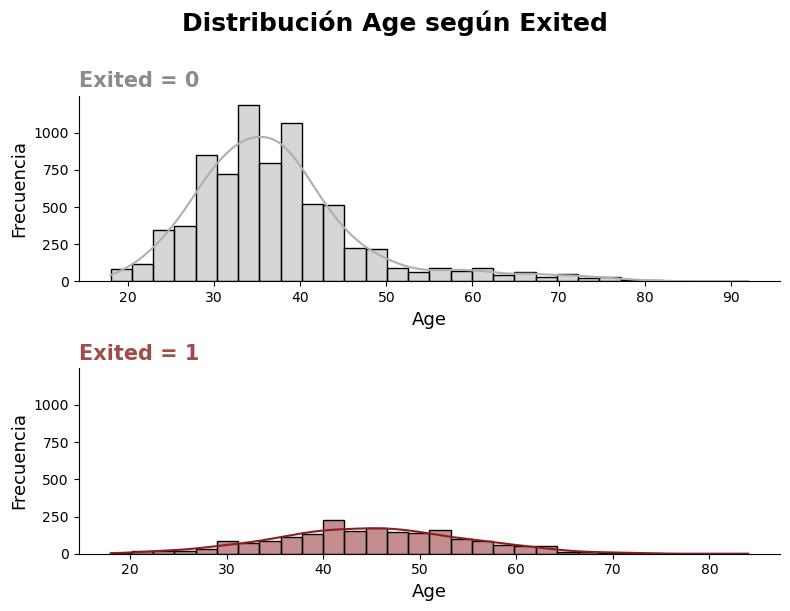

In [41]:
hist_age = histograma_exited(df_clients,
                             xcol='Age',
                             path=IMG_PATH)

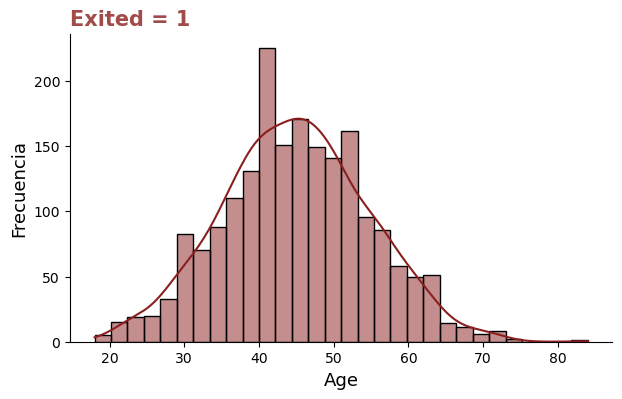

In [42]:
fig, ax = plt.subplots(figsize=(7,4))

sns.histplot(data=df_clients[df_clients['Exited'] == 1], x='Age', bins=30, color=exited_colors[1], kde=True, ax=ax)
ax.set_title("Exited = 1", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
ax.set_xlabel('Age', fontsize=13)
ax.set_ylabel('Frecuencia', fontsize=13)
sns.despine()
plt.show()

### <font color='#FDD2A9'>**Observaciones: Edad del cliente**</font>

Se observa una clara concentración de clientes que abandonan entre rangos de 40 y 55 años aproximadamente.
Particularmente, el 50% de los clientes que abandonan tienen una edad entre 38 y 51 años. Lo cual resulta crítico ya que es una edad madura pero aun con capacidad crediticia. Por lo que, para una empresa FinTech, este es un segmento de cliente muy valioso.


### <font color='#FCB53B'>**2. Los clientes que abandonan, ¿tienden a ser nuevos o clientes antiguos?**</font>

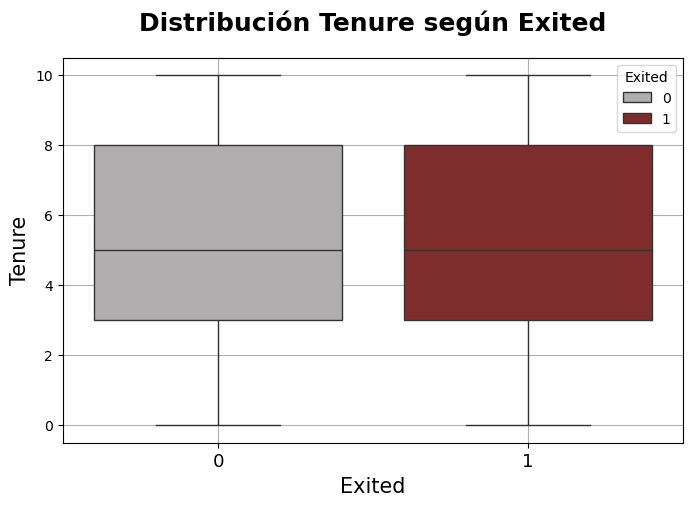

In [43]:
boxplot_edad = boxplot_exited(df=df_clients,
                              ycol='Tenure',
                              path=IMG_PATH)

### <font color='#FDD2A9'>**Observaciones: Antigüedad del cliente**</font>

La distribución de la **angitüedad *(Tenure)*** clientes que abandonan es prácticamente idéntica a la de aquellos que deciden permanecer en la empresa.
Esto a simple vista nos dice que esta característica no es determinante a la hora de predecir el abandono.
Sin embargo, no es lógico que existan las mismas probabilidades de que un cliente de mucha antigüedad abandone que uno nuevo. Esto requerirá un análisis dirigido para entender por qué razón los clientes que deberían ser más fieles se están yendo.

### <font color='#FCB53B'>**3. ¿El género está asociado a mayores niveles de Churn?**</font>

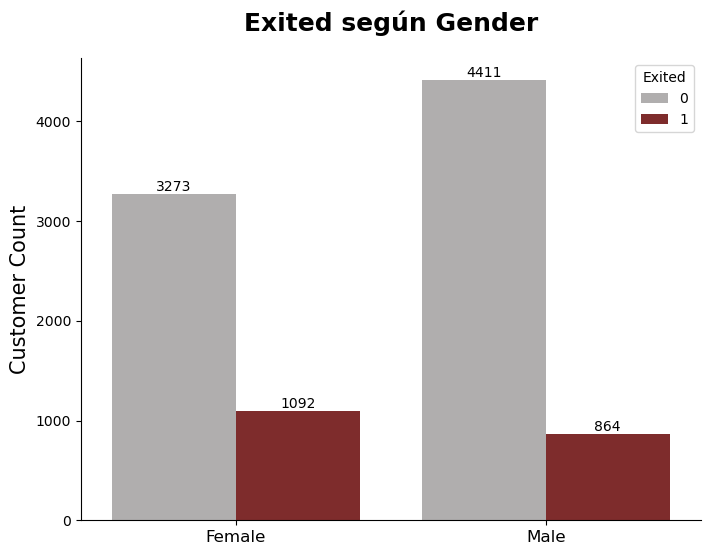

In [44]:
bar_gender = bar_exited(df=df_clients,
                        xcol='Gender',
                        figsize=(8,6),
                        path=IMG_PATH)

In [45]:
gender_counts = pd.DataFrame(df_clients.groupby(['Gender', 'Exited'])['Gender'].value_counts()).reset_index()
gender_counts

,Gender,Exited,count
0,Female,0,3273
1,Female,1,1092
2,Male,0,4411
3,Male,1,864


In [46]:
gender_exit_rate_table = pivot_and_exited_rate(df=gender_counts,
                                              index_col='Gender')
gender_exit_rate_table

,Gender,No Exited,Exited,Exit Rate (%)
0,Female,3273,1092,25.02
1,Male,4411,864,16.38


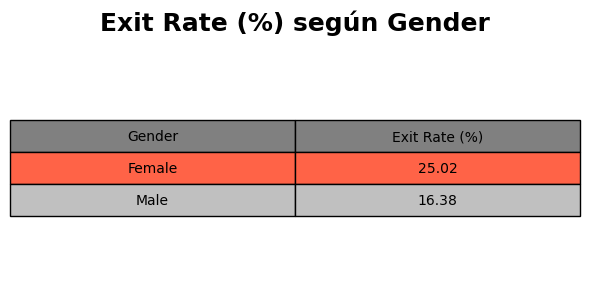

In [47]:
gender_exit_rate_plot = plot_exited_rate_table(df=gender_exit_rate_table,
                                               col='Gender',
                                               path=IMG_PATH)

### <font color='#FDD2A9'>**Observaciones: Género**</font>

La tasa de **abandono en mujeres es aproximádamente 9% mayor que en hombres**.

Si bien esto podría ser una simple casualidad, resulta de suma importancia **realizar un análisis exhaustivo para determinar si no existen sesgos en las oportunidades o condiciones por razones de géneros**.

Especialmente en un contexto cultural con una creciente conciencia en igualdad de género, será **necesario entender** cuáles son las razones por las cuales el **25% de nuestras clientas deciden abandonar** la empresa.

Para ello, se recomienda realizar **análisis de satisfacción a través encuestas, análisis de productos y condiciones ofrecidos, y otros aspectos donde se puedan encontrar sesgos.**

### <font color='#FCB53B'>**4. ¿Está el puntaje crediticio (Credit Score) asociado al abandono de clientes?**</font>

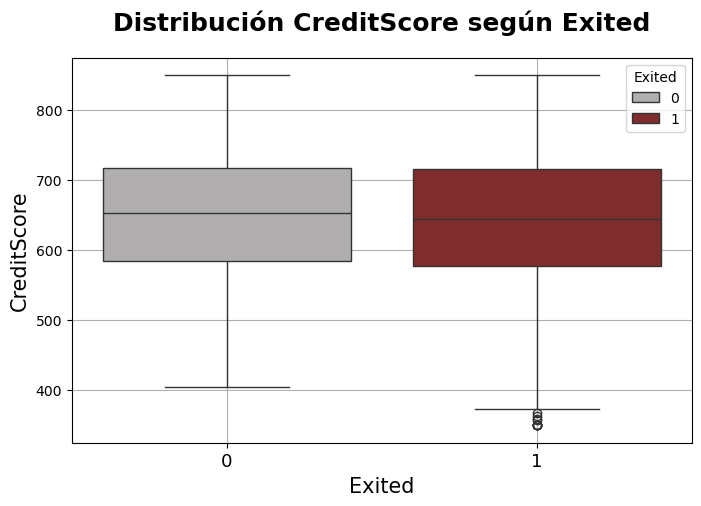

In [48]:
boxplot_edad = boxplot_exited(df=df_clients,
                              ycol='CreditScore',
                              path=IMG_PATH)

### <font color='#FDD2A9'>**Observaciones: CreditScore**</font>

Al igual que con la antigüedad del cliente, la distribución del **puntaje crediticio *(Credit Score)*** es similar en ambos grupos, por lo que este factor no parece ser un determinante para predecir el abandono.

## <font color='#8b1f1f'>**Conclusiones: Perfil del cliente**</font>

A partir de las exploraciones relacionadas al perfil del cliente, se determinó que los factores que parecen relacionarse más al Churn son:

* **Edad**
  > El 50% de clientes que deciden abandonar la empresa se encuentran en un rango de edad entre 38 y 51 años.
  > Este rango etario podría considerarse óptimo para la adquisición de créditos bancarios, por lo cual este fenómeno requerirá un análisis más profundo para entender las razones por las cuales los clientes deciden abandonar la empresa.
  > Una posible hipótesis podría ser que empresas competidoras ofrezcan mejores condiciones crediticias.

* **Género**
  > La tasa de abandono en mujeres es aproximádamente 9% mayor que en hombres.
  > Será necesario entender si existen razones fundadas detrás de esto, ya que podrían existir sesgos en las ofertas o condiciones de los productos de la empresa en cuanto al género. Esto puede ser un área crítica en un contexto cultural cada vez más consciente en asuntos referentes a la igualdad de género.

## <font color='#c37171'>**Geografía e Inflación**</font>

### <font color='#FCB53B'>**5. ¿Algún país presenta un nivel más alto de abandono?**</font>

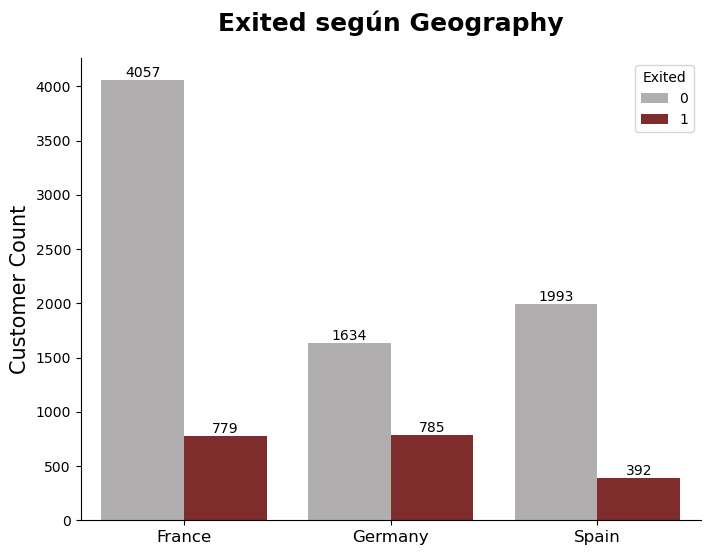

In [49]:
bar_geography = bar_exited(df=df_clients,
                        xcol='Geography',
                        figsize=(8,6),
                        path=IMG_PATH)

In [50]:
geography_counts = pd.DataFrame(df_clients.groupby(['Geography', 'Exited'])['Geography'].value_counts()).reset_index()

In [51]:
geography_exit_rate_table = pivot_and_exited_rate(df=geography_counts,
                                                  index_col='Geography')
geography_exit_rate_table

,Geography,No Exited,Exited,Exit Rate (%)
1,Germany,1634,785,32.45
2,Spain,1993,392,16.44
0,France,4057,779,16.11


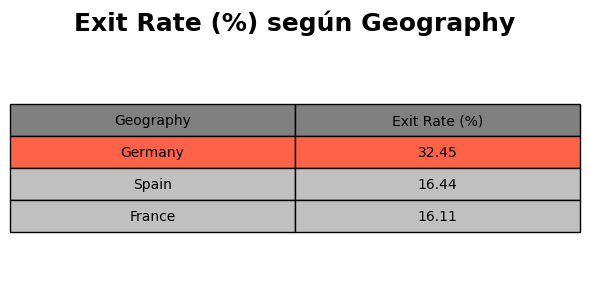

In [52]:
gender_exit_rate_plot = plot_exited_rate_table(df=geography_exit_rate_table,
                                               col='Geography',
                                               path=IMG_PATH)

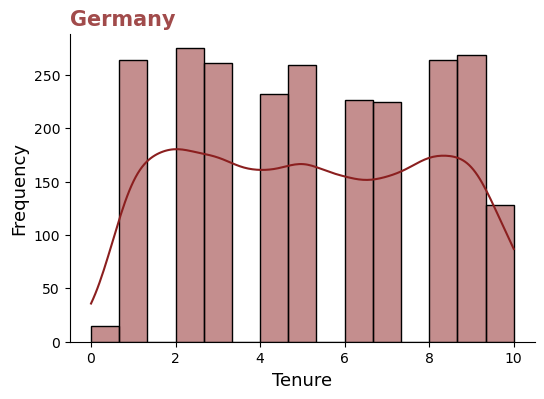

In [53]:
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data=df_clients[df_clients['Geography'] == 'Germany'], x='Tenure', bins=15, color=exited_colors[1], kde=True, ax=ax)
ax.set_title("Germany", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
ax.set_xlabel('Tenure', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
sns.despine()
plt.show()

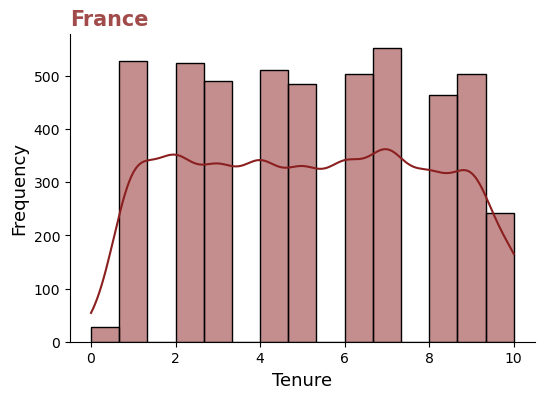

In [54]:
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data=df_clients[df_clients['Geography'] == 'France'], x='Tenure', bins=15, color=exited_colors[1], kde=True, ax=ax)
ax.set_title("France", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
ax.set_xlabel('Tenure', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
sns.despine()
plt.show()

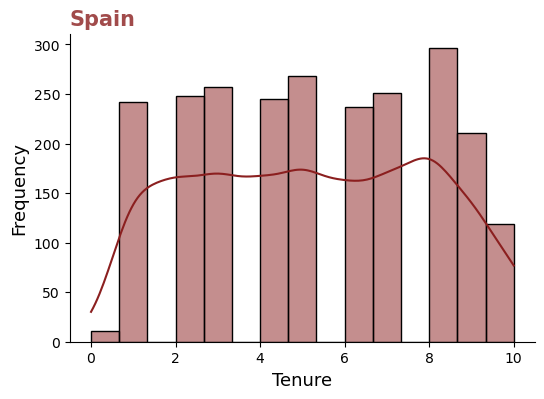

In [55]:
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data=df_clients[df_clients['Geography'] == 'Spain'], x='Tenure', bins=15, color=exited_colors[1], kde=True, ax=ax)
ax.set_title("Spain", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
ax.set_xlabel('Tenure', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
sns.despine()
plt.show()

### <font color='#FDD2A9'>**Observaciones: Abandono según País**</font>

Como es posible observar en el gráfico y tabla presentados al inicio de esta sección, **Alemania *(Germany)*** preseta una **tasa de abandono dos veces mayor** que la de los otros dos países donde opera la empresa.

Esto señala un claro descontento por los clientes de dicho país. Para entender un poco más este fenómeno, se investigó si este era un mercado nuevo, quizás en etapas aún experimentales, dado que la cantidad total de clientes en relación a **Francia *(France)*** es bastante menor, pero se observó que **la distribución de la antigüedad de los clientes es similar en todos los países**, lo cual sugiere que **el descontento no es algo reciente, sino más bien un factor constante.**

Esto podría estar relacionado a **factores culturales**, **políticas de la empresa dentro de las regulaciones del país**, u **otro tipo de factores** que requerirán un análisis enfocado sólo en **aspectos del mercado Alemán**.

### <font color='#FCB53B'>**6. ¿Está relacionado el abandono con la inflación del país?**</font>

In [56]:
churners = df_clients[df_clients['Exited'] == 1]

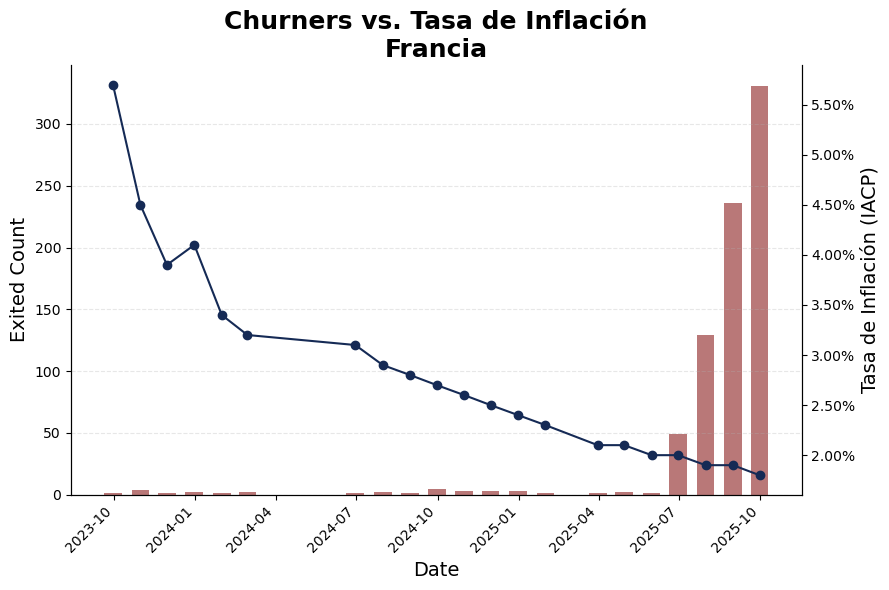

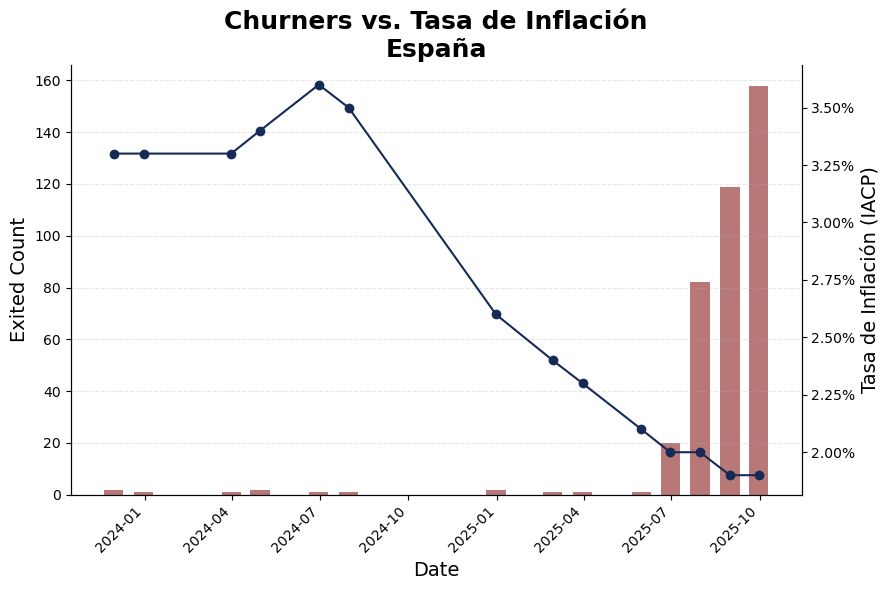

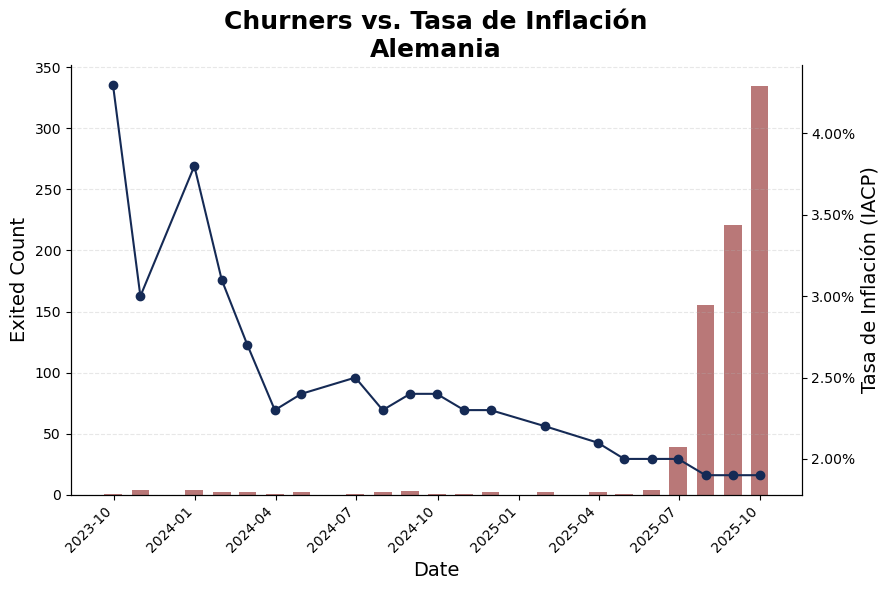

In [57]:
import matplotlib.dates as mdates

for country in df_clients['Geography'].unique():

    country_churners = churners[churners['Geography'] == country]
    cids = country_churners['CustomerId'].unique()
    country_inflation = df_inflation[df_inflation['Geography'] == country]
    country_inflation['month_year'] = country_inflation['month_date'].dt.to_period('M')
    country_churners['month_year'] = country_churners['ExitDate'].dt.to_period('M')
    country_churners = country_churners.merge(country_inflation, on='month_year')
    country_churners_counts = pd.DataFrame(country_churners.groupby(['month_date', 'inflation_rate'])['Exited'].sum()).reset_index()

    fig, ax1 = plt.subplots(figsize=(9, 6))

    color_volume = exited_colors[1]  
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Exited Count', fontsize=14)
    # Graficar barras
    ax1.bar(country_churners_counts['month_date'], country_churners_counts['Exited'], color=color_volume, alpha=0.6, width=20)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Formatear eje X para mostrar solo año y fecha
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45, ha='right')
    
    # Axis secundaria para la inflación
    ax2 = ax1.twinx()  
    color_inflation = AZUL_2
    ax2.set_ylabel('Tasa de Inflación (IACP)', fontsize=14)
    # Graficar la tasa de inflación
    ax2.plot(country_churners_counts['month_date'], country_churners_counts['inflation_rate'], color=color_inflation, marker='o', linestyle='-')
    ax2.tick_params(axis='y')
    
    # Formatear axis secundario a porcentajes
    ax2.yaxis.set_major_formatter(plt.FuncFormatter('{:.2%}'.format))
    
    if country == 'Germany':
         plt.title(f'Churners vs. Tasa de Inflación\nAlemania', fontsize=18, fontweight='bold')
    elif country == 'France':
        plt.title(f'Churners vs. Tasa de Inflación\nFrancia', fontsize=18, fontweight='bold')
    else:
        plt.title(f'Churners vs. Tasa de Inflación\nEspaña', fontsize=18, fontweight='bold')
        
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    fig.tight_layout()
    plt.savefig(IMG_PATH/f'{country}_churn_inflation_doble_axis.png', dpi=300)
    plt.show() 

### <font color='#FDD2A9'>**Observaciones: Influencia de la inflación del país en el abandono**</font>

Como puede verse en los gráficos de cada país. A pesar de que la tasa de inflación (IACP - Indice Armonizado de Precios al Consumo) disminuye en los tres países observados a lo largo del período estudiado, la concentración de clientes que abandonan, se produce en los momentos más bajos del IACP.

Esto resulta en un punto crítico ya que es justamente en momentos en los cuales la inflación es baja donde la salud macroeconómica es óptima para realizar inversiones. Lo que podría indicar que nuestros competidores están ofreciendo mejores condiciones, oportunidades o productos financieros, incitando a nuestros clientes a decidirse por un cambio de institución.

## <font color='#8b1f1f'>**Conclusiones: Geografía e Inflación**</font>

* **Geografía**
  > Se descubrió que existen una tasa de abandono significativamente mayor en Alemania. Será necesario hacer un análisis dirigido a las características presentes en este país para poder entender que factores hacen que este país en particular presente una tasa de abandono 2 veces mayor que en los otros dos territorios donde opera la empresa.

* **Inflación**
  > A pesar de una Tasa de Inflación decreciente, el abandono de clientes se concentra particularmente en momentos donde el indice inflaciónal es menor en todo el período observado. Esto es un fuerte indicador de que los clientes podrían estar tomando la decisión de cambiar de institución para realizar inversiones con otros prestadores de servicios.
  


### **NOTA**:

Los IACP hasta **Agosto 2024** son datos oficiales tomados de **Eurostat** (último registro oficial al día del análisis), el resto fueron estimados por la inteligencia artificial utilizando como fuente:

Fuente Proyecciones: FMI / Comisión Europea (tendencia mensual simulada para alinear)




## <font color='#c37171'>**Transacciones del cliente**</font>

### <font color='#FCB53B'>**7. Los clientes que abandonan, ¿presentan algún comportamiento similar en el volumen de transacciones antes de irse?**</font>

In [58]:
df_tx_exited = df_tx.merge(df_clients[['CustomerId', 'Exited']], on='CustomerId')

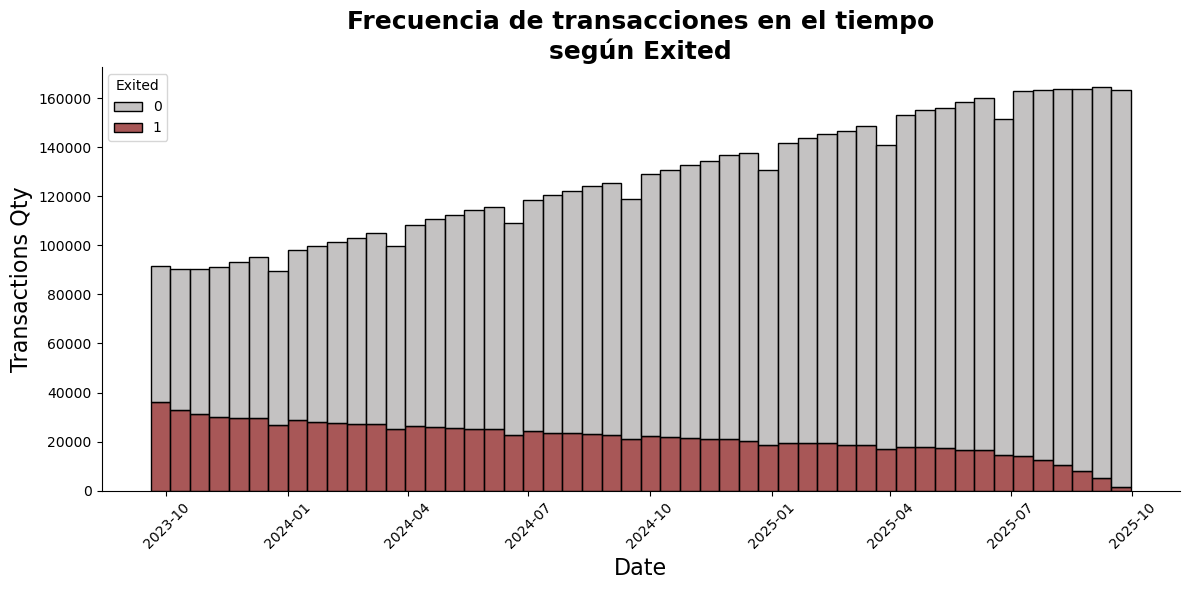

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_tx_exited, 
    x="date",
    hue="Exited",
    bins=50,          
    multiple="stack",
    palette=exited_colors
)
plt.title("Frecuencia de transacciones en el tiempo\nsegún Exited", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=16)
plt.ylabel("Transactions Qty", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(IMG_PATH/'eda_transaction_frequency.png', dpi=300)
sns.despine()
plt.show()

In [60]:
CUTOFF_DATE = df_tx['date'].max() - pd.Timedelta(days=90)
WINDOW_DATE = CUTOFF_DATE - pd.Timedelta(days=180)

In [61]:
churners = df_clients[(df_clients['Exited'] == 1) & (df_clients['ExitDate'] >= CUTOFF_DATE)]
no_churners = df_clients[df_clients['Exited'] == 0].sample(len(churners), random_state=42)

In [62]:
ids_churners = churners['CustomerId'].unique()
ids_no_churners = no_churners['CustomerId'].unique()

In [63]:
len(churners)

1764

In [64]:
ids_sampled = np.concatenate((ids_churners, ids_no_churners))

In [65]:
df_tx_exited_sampled = df_tx_exited[df_tx_exited['CustomerId'].isin(ids_sampled)].copy()

In [66]:
df_tx_exited_sampled = df_tx_exited_sampled[(df_tx_exited_sampled['date'] >= WINDOW_DATE) & (df_tx_exited_sampled['date'] < CUTOFF_DATE)]

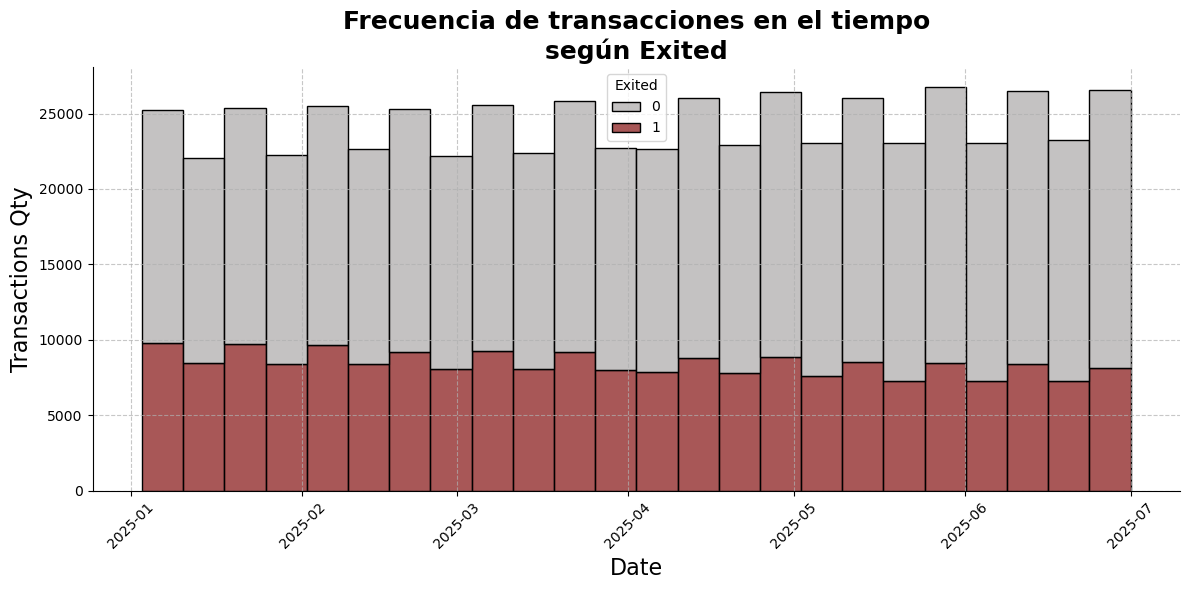

In [67]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_tx_exited_sampled, 
    x="date",
    hue="Exited",
    bins=24,          
    multiple="stack",
    palette=exited_colors
)
plt.title("Frecuencia de transacciones en el tiempo\nsegún Exited", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=16)
plt.ylabel("Transactions Qty", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(IMG_PATH/'transaction_frequency_sampled.png', dpi=300)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### <font color='#FDD2A9'>**Observaciones: Volumen de transacciones según Abandono**</font>

In [68]:
CUTOFF_DATE

Timestamp('2025-07-02 00:00:00')

In [69]:
df_tx['date'].max()

Timestamp('2025-09-30 00:00:00')

In [70]:
WINDOW_DATE

Timestamp('2025-01-03 00:00:00')

In [71]:
len(churners)

1764

Se puede observar en el primer gráfico que el comportamiento de la cantidad de transacciones disminuye notablemente. Sin embargo, la cantidad de No Churners es considerablemente mayor a la cantidad de Churners, por lo que:

Para evaluar este comportamiento se tomó una muestra de la siguiente manera:
* Se consideraron Churners solo los clientes que abandonaron la empresa entre el **2025-07-02** y el **2025-09-30**
* Se consideró una ventana de observación de 6 meses: entre **2025-01-03** y **2025-07-02**
* Se tomo una muestra de 1764 clientes **No Churners**, para que el volumen de transacciones fuese relativo a la misma cantidad de clientes observados.


Así, si bien el declive en el volumen transaccional es menos pronunciado, es posible observar que mientras el volumen de transacciones de los No Churners (GRIS) se mantiene estable dentro del período observado, el volumen transaccional de los clientes que abandonaron dentro de los tres meses posteriores a `CUTOFF_DATE` disminuye a medida que se acerca dicha fecha.
Esto es un indicador de que, como es de esperarse, la actividad del cliente tiende a disminuir cuando se aproxima un evento de Churn, por lo cual el volumen de transacciones mensual será probablemente un indicador a tener en cuenta.

### <font color='#FCB53B'>**8. ¿Difieren los montos de las transacciones de acuerdo a la condición de abandono?**</font>

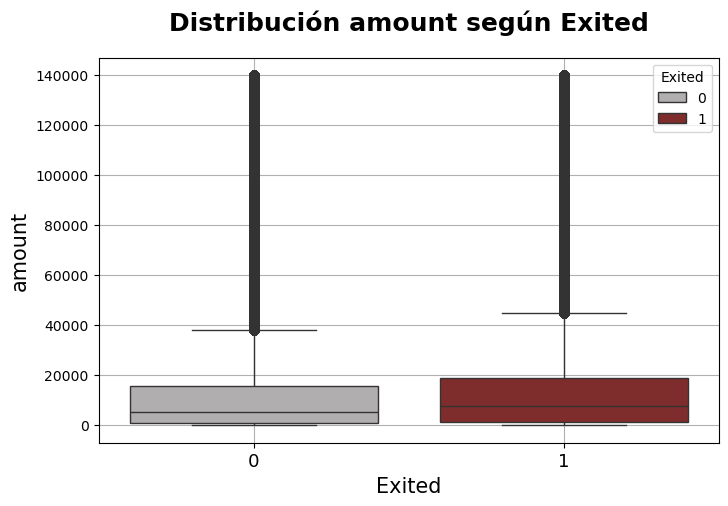

In [72]:
boxplot_tx = boxplot_exited(df=df_tx_exited,
                            ycol='amount',
                            path=IMG_PATH)

In [73]:
tx_no_churners = df_tx_exited[df_tx_exited['Exited'] == 0]

In [74]:
tx_no_churners.describe()

,date,amount,Exited
count,5282159,5.282159e+06,5282159.0
mean,2024-11-24 23:18:24.207806464,1.198626e+04,0.0
min,2023-09-19 00:00:00,1.000000e+00,0.0
25%,2024-06-16 00:00:00,9.424250e+02,0.0
50%,2024-12-21 00:00:00,5.293090e+03,0.0
75%,2025-05-23 00:00:00,1.582871e+04,0.0
max,2025-09-30 00:00:00,1.399947e+05,0.0
std,NaN,1.910790e+04,0.0


In [75]:
tx_churners = df_tx_exited[df_tx_exited['Exited'] == 1]

In [76]:
tx_churners.describe()

,date,amount,Exited
count,1080461,1.080461e+06,1080461.0
mean,2024-07-22 05:22:31.739674368,1.394846e+04,1.0
min,2023-09-19 00:00:00,1.000000e+00,1.0
25%,2024-01-29 00:00:00,1.353450e+03,1.0
50%,2024-07-02 00:00:00,7.884400e+03,1.0
75%,2025-01-01 00:00:00,1.870574e+04,1.0
max,2025-09-29 00:00:00,1.399814e+05,1.0
std,NaN,2.069736e+04,0.0


In [77]:
def label_tx(df):

    iq1 = df['amount'].quantile(0.25)
    iq3 = df['amount'].quantile(0.75)
    iqr = iq3 - iq1
    upper_bound = iq3 + (iqr * 1.5)
    lower_bound = iq1 - (iqr * 1.5)

    df['tx_label'] = 'Regular'

    df.loc[(df['amount'] > upper_bound) | (df['amount'] < lower_bound), 'tx_label'] = 'Outlier'

    return df

In [78]:
tx_no_churners = label_tx(tx_no_churners)

In [79]:
tx_churners = label_tx(tx_churners)

In [80]:
tx_no_churners_filtered = tx_no_churners[tx_no_churners['tx_label'] == 'Regular']
tx_churners_filtered = tx_churners[tx_churners['tx_label'] == 'Regular']

In [81]:
txs_no_outliers = pd.concat([tx_no_churners_filtered, tx_churners_filtered])

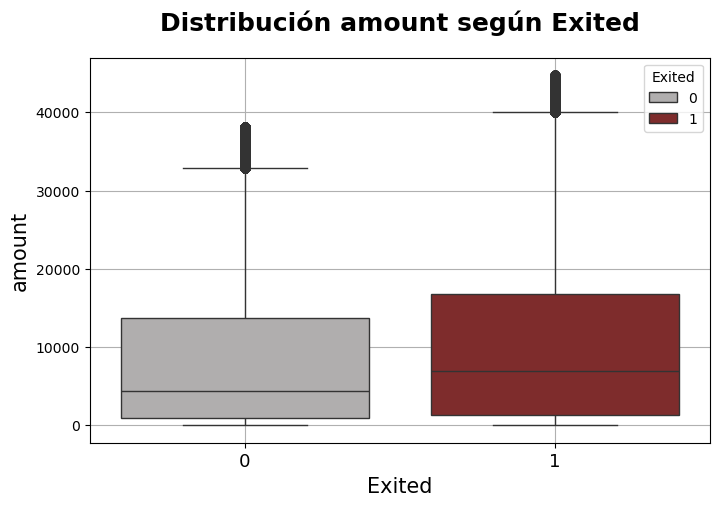

In [82]:
boxplot_tx = boxplot_exited(df=txs_no_outliers,
                            ycol='amount',
                            path=IMG_PATH)

In [83]:
np.round(tx_churners['amount'].describe(), 2)

count    1080461.00
mean       13948.46
std        20697.36
min            1.00
25%         1353.45
50%         7884.40
75%        18705.74
max       139981.39
Name: amount, dtype: float64

In [84]:
np.round(tx_no_churners['amount'].describe(), 2)

count    5282159.00
mean       11986.26
std        19107.90
min            1.00
25%          942.42
50%         5293.09
75%        15828.71
max       139994.74
Name: amount, dtype: float64

### <font color='#FDD2A9'>**Observaciones: Monto de transacciones según Abandono**</font>

Si bien la distribución del monto de las transacciones entre **Churners** y **No Churners** no parece diferir tanto, hay algo que puede resultar alarmante y es que de lo clientes que deciden abandonar el 50% de las transacciones se encuentran entre **1353 EUR y 18705 EUR**,  mientras que el 50% de las transacciones de aquellos clientes que permanecen en la empresa van de **942 EUR hasta 15828 EUR**.

Esto implica que los clientes que deciden irse tienen un buen poder adquisitivo ya que predominan transacciones de montos más elevados entre ellos. De aquí se puede derivar un análisis sobre qué etiqueta de cluster asignada a los clientes predomina entre los churners, para así entender que tipo de cliente es el que decide irse.

### <font color='#FCB53B'>**Extra: Customer Cluster Label**</font>

In [85]:
cluster_label_counts = pd.DataFrame(df_clients.groupby(['cluster_label', 'Exited'])['cluster_label'].value_counts()).reset_index()

In [86]:
exit_rate_cluster_label = pivot_and_exited_rate(cluster_label_counts,
                                                index_col='cluster_label')

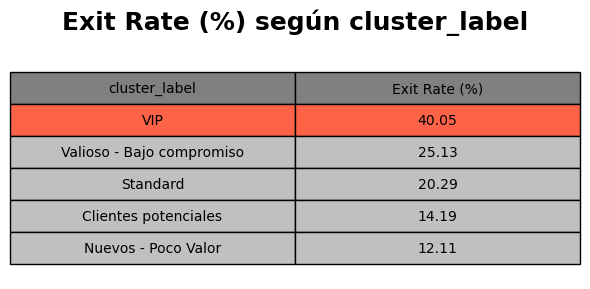

In [87]:
exit_rate_cluster_table = plot_exited_rate_table(df=exit_rate_cluster_label,
                                                 col='cluster_label',
                                                 path=IMG_PATH)

In [88]:
exit_rate_cluster_label = exit_rate_cluster_label.sort_values(by='Exit Rate (%)', ascending=False)

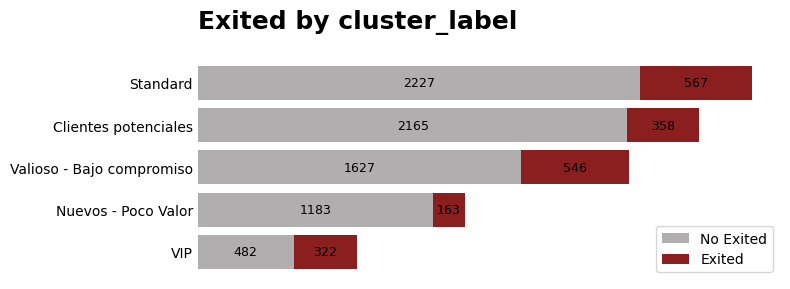

In [89]:
barh_cluster_label = barh_stack_exited(df=exit_rate_cluster_label,
                                       ycol='cluster_label',
                                       path=IMG_PATH)

## <font color='#8b1f1f'>**Conclusiones: Transacciones del cliente**</font>

* **Decaida de volumen de transacciones**
  > Se observó que los clientes que decidieron abandonar la empresa dentro de los 3 meses a partir de una fecha de corte establecida, mostraron una decaida progresiva en la cantidad de transacciones realizadas dentro de los 6 meses previos a la fecha de corte.
  > Esto sugiere que es necesario monitorear el volumen de transacciones realizadas por un cliente para prevenir el abandono. Podría establecerse el prmedio - una desviación estándar aceptable para generar una alarma sobre el ID del cliente para tomar medidas preventivas si su volumen transaccional cae por debajo de dicho umbral.

* **Clientes VIP abandonan**
  > Gracias a la evaluación del monto de las transacciones de los distintos grupos (Churners y No Churners), se descubrió que dentro de la clusterización realizada en el proceso de consolidación de los datasets, el perfil de cliente que tiene mayor tasa de abandono son los clientes VIP, es decir, clientes con: Alto poder adquisitivo, Alto compromiso, y Alta antiguedad.
  > Esto resulta extremadamente crítico, ya que se observó que el 40% de los clientes más valiosos de la empresa decidieron abandonar. De aquí podría derivarse otra exploración, para entender que monto transaccional neto se ha perdido debido al abandono de dichos clientes.

## <font color='#c37171'>**Interacciones del cliente con la App**</font>

### <font color='#FCB53B'>**10. Los clientes que abandonan, ¿muestran algún patrón particular en la frecuencia de inicio de sesiones?**</font>

In [90]:
df_ss_exited = df_ss.merge(df_clients[['CustomerId', 'Exited', 'ExitDate']], on='CustomerId')

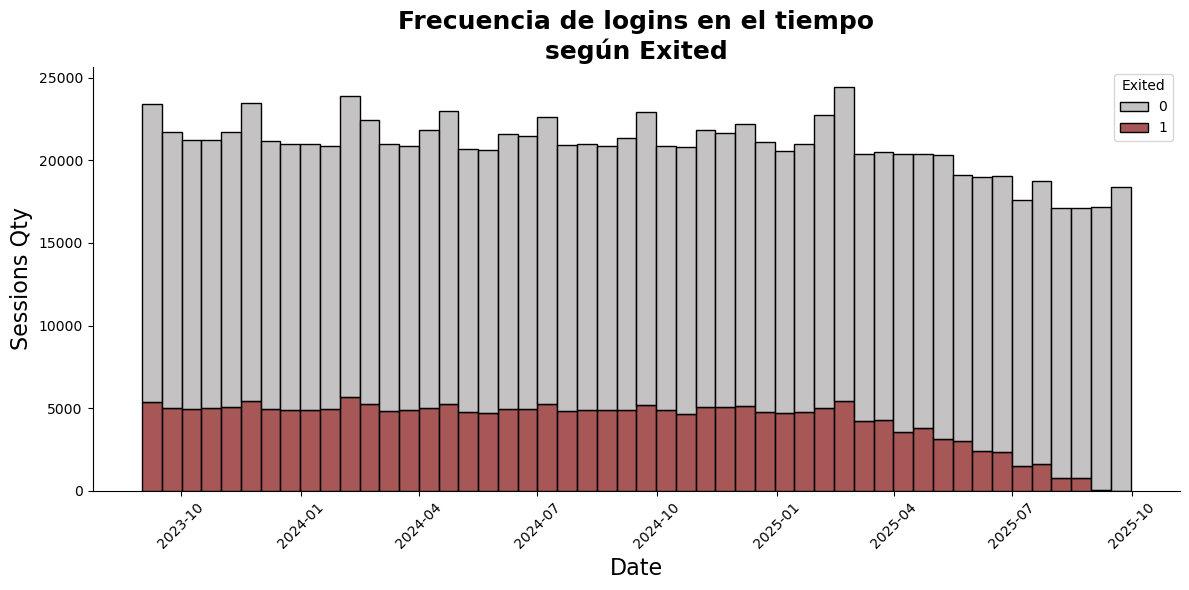

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_ss_exited, 
    x="date",
    hue="Exited",
    bins=50,          
    multiple="stack",
    palette=exited_colors
)
plt.title("Frecuencia de logins en el tiempo\nsegún Exited", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=16)
plt.ylabel("Sessions Qty", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(IMG_PATH/'eda_sessions_frequency.png', dpi=300)
sns.despine()
plt.show()

In [92]:
churners = df_clients[(df_clients['Exited'] == 1) & (df_clients['ExitDate'] >= CUTOFF_DATE)]
no_churners = df_clients[df_clients['Exited'] == 0].sample(len(churners), random_state=42)

In [93]:
ids_churners = churners['CustomerId'].unique()
ids_no_churners = no_churners['CustomerId'].unique()

In [94]:
ids_sampled = np.concatenate((ids_churners, ids_no_churners))

In [95]:
df_ss_exited_sampled = df_ss_exited[df_ss_exited['CustomerId'].isin(ids_sampled)].copy()
df_ss_exited_sampled = df_ss_exited_sampled[(df_ss_exited_sampled['date'] >= WINDOW_DATE) & (df_ss_exited_sampled['date'] < CUTOFF_DATE)]

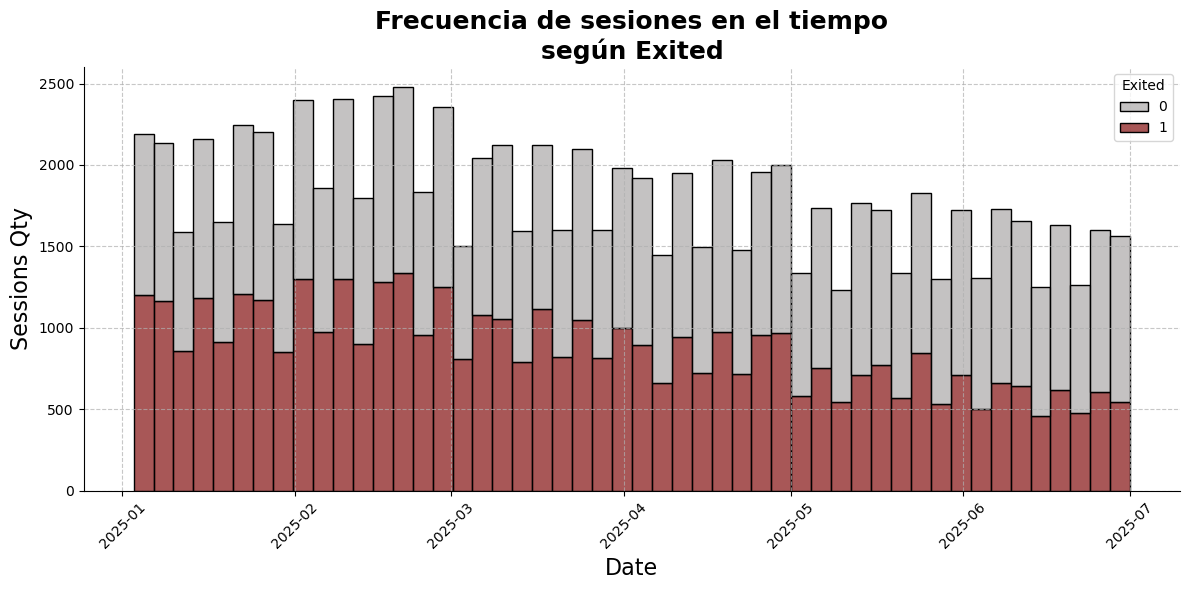

In [96]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_ss_exited_sampled, 
    x="date",
    hue="Exited",
    bins=50,          
    multiple="stack",
    palette=exited_colors
)
plt.title("Frecuencia de sesiones en el tiempo\nsegún Exited", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=16)
plt.ylabel("Sessions Qty", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(IMG_PATH/'sessions_frequency_sampled.png', dpi=300)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [97]:
df_ss_exited_sampled.sample()

,session_id,CustomerId,cluster_label,date,duration_min,used_transfer,used_payment,used_invest,opened_push,failed_login,month,Exited,ExitDate
782792,291603,15627352,Standard,2025-03-03,33.972627,0,0,0,0,0,2025-03-01,1,2025-08-28


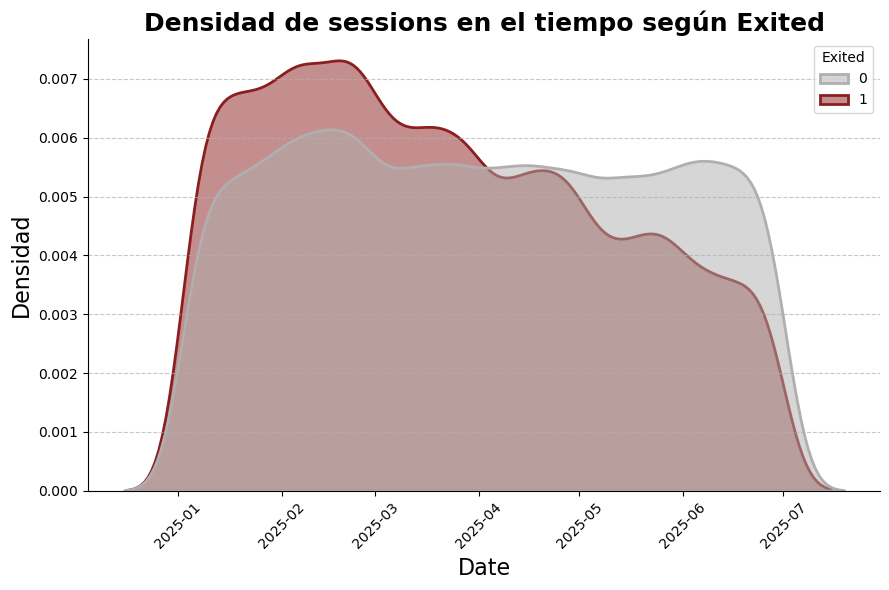

In [98]:
kde_density_ss = kde_density_exited(df=df_ss_exited_sampled,
                                    xcol='date',
                                    title='sessions',
                                    path=IMG_PATH)

### <font color='#FDD2A9'>**Observaciones: Frecuecia de Sesiones según Abandono**</font>

Para medir el volumen de sesiones del cliente, para medir la cantidad de inicios de sessión se tomó, para evaluar dicho comportamiento una muestra de igual manera:

* Se consideraron Churners solo los clientes que abandonaron la empresa entre el **2025-07-02** y el **2025-09-30**
* Se consideró una ventana de observación de 6 meses: entre **2025-01-03** y **2025-07-02**
* Se tomo una muestra de 1764 clientes **No Churners**, para que el volumen de sesiones fuese relativo a la misma cantidad de clientes observados.

A partir de ambos gráficos (barras apiladas y densidad) es posible observar que mientras el volumen de sesiones de los No Churners (GRIS) se mantiene estable dentro del período observado, los clientes que abandonaron dentro de los tres meses posteriores a `CUTOFF_DATE` interactúan cada vez menos con la aplicación de la empresa a medida que se aproxima el evento de Churn.

### <font color='#FCB53B'>**11. Los clientes que abandonan, ¿cuentan con mayor cantidad de inicios de sesión fallidos?**</font>

In [99]:
df_ss_exited.sample()

,session_id,CustomerId,cluster_label,date,duration_min,used_transfer,used_payment,used_invest,opened_push,failed_login,month,Exited,ExitDate
975619,969044,15680611,VIP,2025-07-31,26.80732,0,0,1,0,0,2025-07-01,0,NaT


In [100]:
failed_sessions_count = pd.DataFrame(df_ss_exited_sampled.groupby(['month', 'Exited'])['failed_login'].value_counts()).reset_index()

In [101]:
failed_sessions_count = failed_sessions_count[failed_sessions_count['month'] < '2025-07-01']

In [102]:
failed_sessions_count

,month,Exited,failed_login,count
0,2025-01-01,0,0,7128
1,2025-01-01,0,1,131
2,2025-01-01,1,0,8405
3,2025-01-01,1,1,142
4,2025-02-01,0,0,7804
5,2025-02-01,0,1,177
6,2025-02-01,1,0,8868
7,2025-02-01,1,1,178
8,2025-03-01,0,0,7683
9,2025-03-01,0,1,203


In [103]:
pivot_df = failed_sessions_count.pivot_table(index='month', 
                                 columns=['Exited', 'failed_login'], 
                                 values='count',
                                 fill_value=0)

In [104]:
pivot_df

Exited             0              1       
failed_login       0      1       0      1
month                                     
2025-01-01    7128.0  131.0  8405.0  142.0
2025-02-01    7804.0  177.0  8868.0  178.0
2025-03-01    7683.0  203.0  8200.0  153.0
2025-04-01    7515.0  186.0  6930.0  125.0
2025-05-01    7533.0  178.0  5806.0  124.0
2025-06-01    7579.0  161.0  4632.0  100.0

In [105]:
pivot_df.columns = [f'Exited_{exited}_Failed_{failed}' for exited, failed in pivot_df.columns]
pivot_df

,Exited_0_Failed_0,Exited_0_Failed_1,Exited_1_Failed_0,Exited_1_Failed_1
month,,,,
2025-01-01,7128.0,131.0,8405.0,142.0
2025-02-01,7804.0,177.0,8868.0,178.0
2025-03-01,7683.0,203.0,8200.0,153.0
2025-04-01,7515.0,186.0,6930.0,125.0
2025-05-01,7533.0,178.0,5806.0,124.0
2025-06-01,7579.0,161.0,4632.0,100.0


In [106]:
pivot_df['Ratio_Failed_Exited_0'] = pivot_df['Exited_0_Failed_1'] / (pivot_df['Exited_0_Failed_0'] + pivot_df['Exited_0_Failed_1'])
pivot_df['Ratio_Failed_Exited_1'] = pivot_df['Exited_1_Failed_1'] / (pivot_df['Exited_1_Failed_0'] + pivot_df['Exited_1_Failed_1'])

In [107]:
pivot_df

,Exited_0_Failed_0,Exited_0_Failed_1,Exited_1_Failed_0,Exited_1_Failed_1,Ratio_Failed_Exited_0,Ratio_Failed_Exited_1
month,,,,,,
2025-01-01,7128.0,131.0,8405.0,142.0,0.018047,0.016614
2025-02-01,7804.0,177.0,8868.0,178.0,0.022178,0.019677
2025-03-01,7683.0,203.0,8200.0,153.0,0.025742,0.018317
2025-04-01,7515.0,186.0,6930.0,125.0,0.024153,0.017718
2025-05-01,7533.0,178.0,5806.0,124.0,0.023084,0.020911
2025-06-01,7579.0,161.0,4632.0,100.0,0.020801,0.021133


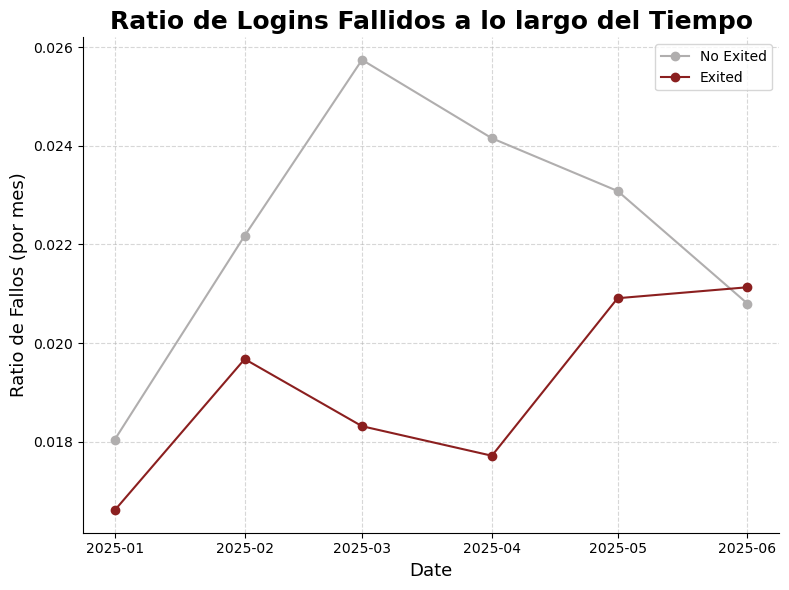

In [108]:
fig, ax = plt.subplots(figsize=(8, 6))

# Exited = 0
ax.plot(pivot_df.index, 
        pivot_df['Ratio_Failed_Exited_0'], 
        marker='o', 
        linestyle='-',
        label='No Exited', 
        color=exited_colors[0])

# Exited = 1
ax.plot(pivot_df.index, 
        pivot_df['Ratio_Failed_Exited_1'], 
        marker='o', 
        linestyle='-',
        label='Exited', 
        color=exited_colors[1])

ax.set_title('Ratio de Logins Fallidos a lo largo del Tiempo', fontsize=18, fontweight='bold')
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Ratio de Fallos (por mes)', fontsize=13)

ax.legend()


ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
sns.despine()
plt.savefig(IMG_PATH / 'ratio_failed_logins.png', dpi=300)
plt.show()

In [109]:
df_ss_exited_capped = df_ss_exited[(df_ss_exited['month'] < CUTOFF_DATE) & (df_ss_exited['month'] > WINDOW_DATE)]

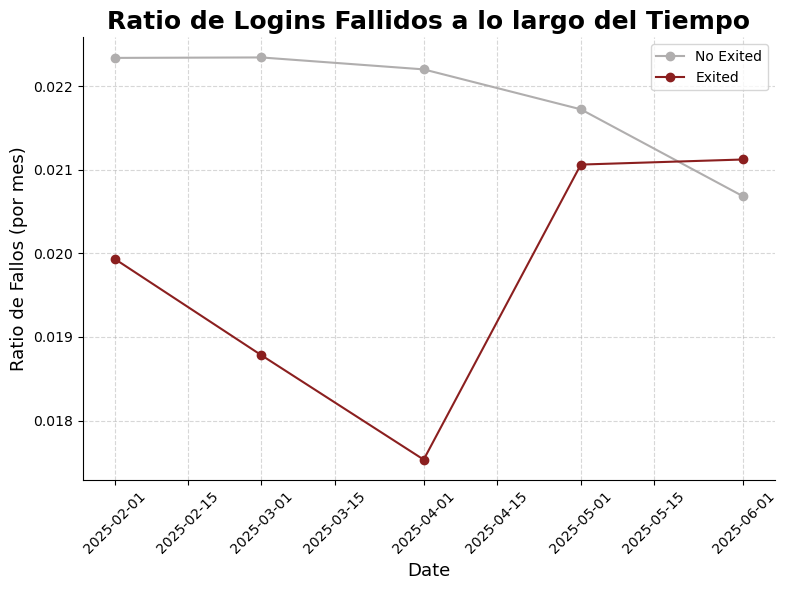

In [110]:
failed_sessions_count = pd.DataFrame(df_ss_exited_capped.groupby(['month', 'Exited'])['failed_login'].value_counts()).reset_index()
failed_sessions_count = failed_sessions_count[failed_sessions_count['month'] < '2025-07-01']
pivot_df = failed_sessions_count.pivot_table(index='month', 
                                 columns=['Exited', 'failed_login'], 
                                 values='count',
                                 fill_value=0)
pivot_df.columns = [f'Exited_{exited}_Failed_{failed}' for exited, failed in pivot_df.columns]
pivot_df['Ratio_Failed_Exited_0'] = pivot_df['Exited_0_Failed_1'] / (pivot_df['Exited_0_Failed_0'] + pivot_df['Exited_0_Failed_1'])
pivot_df['Ratio_Failed_Exited_1'] = pivot_df['Exited_1_Failed_1'] / (pivot_df['Exited_1_Failed_0'] + pivot_df['Exited_1_Failed_1'])

fig, ax = plt.subplots(figsize=(8, 6))

# Exited = 0
ax.plot(pivot_df.index, 
        pivot_df['Ratio_Failed_Exited_0'], 
        marker='o', 
        linestyle='-',
        label='No Exited', 
        color=exited_colors[0])

# Exited = 1
ax.plot(pivot_df.index, 
        pivot_df['Ratio_Failed_Exited_1'], 
        marker='o', 
        linestyle='-',
        label='Exited', 
        color=exited_colors[1])

ax.set_title('Ratio de Logins Fallidos a lo largo del Tiempo', fontsize=18, fontweight='bold')
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Ratio de Fallos (por mes)', fontsize=13)
ax.tick_params(axis='x',rotation=45)

ax.legend()


ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
sns.despine()
plt.savefig(IMG_PATH / 'ratio_failed_logins.png', dpi=300)
plt.show()

### <font color='#FDD2A9'>**Observaciones: Ratio de sesiones fallidas según Abandono**</font>

Inicialmente se observó el ratio en la muestra de clientes tomada de la misma manera que para el volumen de inicios de sesiones.
Sin embargo, al utilizar el ratio de sesiones fallidas, es posible tomar la totalidad de clientes dentro de la ventana de tiempo.

De esta manera, es posible observar que en los últimos 2 meses observados, el aumento de sesiones fallidas para los clientes que decidieron irse dentro de los 3 meses siguientes al `CUTOFF_DATE` aumenta considerablemente, lo cual puede ser un fuerte predictor de Churn.
Una experiencia insatisfactoria con la aplicación puede causar frustración, especialmente en espacios de inversión donde los precios son muy fluctuantes.

Por lo que el ratio de sesiones fallidas se postula como un buen feature para el Feature Engineering

### <font color='#FCB53B'>**12. La cantidad de tiempo que un cliente utiliza la app, ¿es un factor asociado al abanodno?**</font>

In [111]:
df_ss_exited_sampled.shape

(90280, 13)

In [112]:
df_ss_exited_sampled['CustomerId'].nunique()

3528

In [113]:
df_ss_exited_sampled.sample()

,session_id,CustomerId,cluster_label,date,duration_min,used_transfer,used_payment,used_invest,opened_push,failed_login,month,Exited,ExitDate
809404,463346,15775294,Nuevos - Poco Valor,2025-03-22,5.342296,0,0,0,0,0,2025-03-01,1,2025-08-31


In [114]:
session_durations = pd.DataFrame(df_ss_exited_sampled.groupby(['month', 'Exited'])['duration_min'].mean()).reset_index()

In [115]:
session_durations

,month,Exited,duration_min
0,2025-01-01,0,19.261886
1,2025-01-01,1,22.350692
2,2025-02-01,0,19.379854
3,2025-02-01,1,21.723615
4,2025-03-01,0,19.028025
5,2025-03-01,1,21.638462
6,2025-04-01,0,19.022290
7,2025-04-01,1,21.705352
8,2025-05-01,0,19.155998
9,2025-05-01,1,21.223224


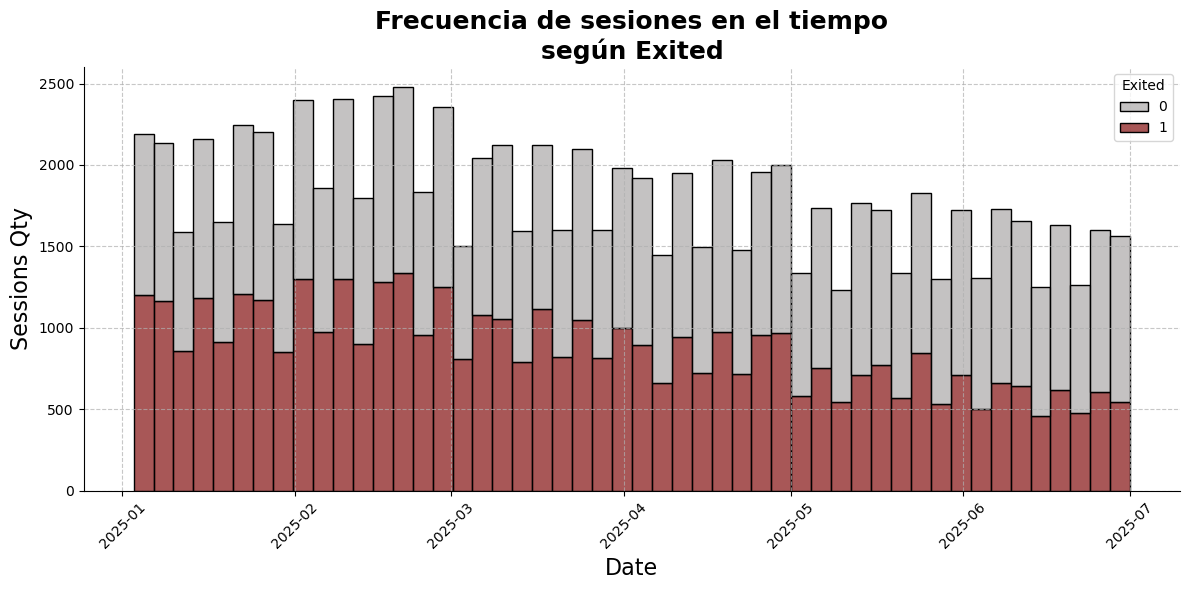

In [116]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=df_ss_exited_sampled, 
    x="date",
    hue="Exited",
    bins=50,          
    multiple="stack",
    palette=exited_colors
)
plt.title("Frecuencia de sesiones en el tiempo\nsegún Exited", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=16)
plt.ylabel("Sessions Qty", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(IMG_PATH/'sessions_frequency_sampled.png', dpi=300)
sns.despine()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [117]:
session_durations_exited_0 = session_durations[session_durations['Exited'] == 0]
session_durations_exited_1 = session_durations[session_durations['Exited'] == 1]

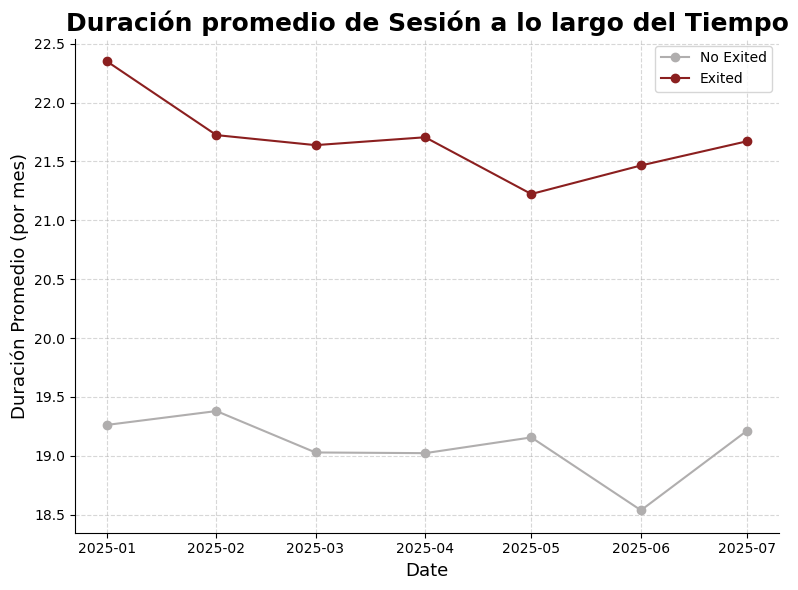

In [118]:
fig, ax = plt.subplots(figsize=(8, 6))

# Exited = 0
ax.plot(session_durations_exited_0['month'], 
        session_durations_exited_0['duration_min'], 
        marker='o', 
        linestyle='-',
        label='No Exited', 
        color=exited_colors[0])

# Exited = 1
ax.plot(session_durations_exited_1['month'], 
        session_durations_exited_1['duration_min'], 
        marker='o', 
        linestyle='-',
        label='Exited', 
        color=exited_colors[1])

ax.set_title('Duración promedio de Sesión a lo largo del Tiempo', fontsize=18, fontweight='bold')
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Duración Promedio (por mes)', fontsize=13)

ax.legend()


ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
sns.despine()
plt.savefig(IMG_PATH / 'average_sessuion_duration.png', dpi=300)
plt.show()

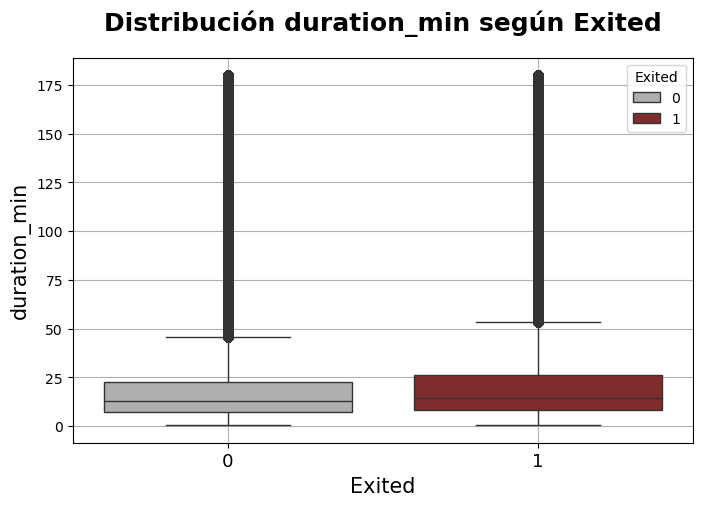

In [119]:
boxplot_ss_duration = boxplot_exited(df=df_ss_exited,
                                     ycol='duration_min',
                                     path=IMG_PATH)

In [120]:
def label_ss_duration(df):

    iq1 = df['duration_min'].quantile(0.25)
    iq3 = df['duration_min'].quantile(0.75)
    iqr = iq3 - iq1
    upper_bound = iq3 + (iqr * 1.5)
    lower_bound = iq1 - (iqr * 1.5)

    df['ss_duration_label'] = 'Regular'

    df.loc[(df['duration_min'] > upper_bound) | (df['duration_min'] < lower_bound), 'ss_duration_label'] = 'Outlier'

    return df

In [121]:
df_ss_exited = label_ss_duration(df_ss_exited)
df_ss_exited.head()

,session_id,CustomerId,cluster_label,date,duration_min,used_transfer,used_payment,used_invest,opened_push,failed_login,month,Exited,ExitDate,ss_duration_label
0,164388,15794014,Clientes potenciales,2023-09-01,8.157487,0,0,1,0,0,2023-09-01,0,NaT,Regular
1,1065356,15713604,VIP,2023-09-01,13.598965,0,0,0,1,0,2023-09-01,0,NaT,Regular
2,561069,15753174,VIP,2023-09-01,34.944366,0,1,0,1,0,2023-09-01,1,2025-06-26,Regular
3,471394,15680370,Clientes potenciales,2023-09-01,10.766769,0,1,0,0,0,2023-09-01,0,NaT,Regular
4,206642,15799031,Clientes potenciales,2023-09-01,2.140092,0,0,0,0,0,2023-09-01,0,NaT,Regular


In [122]:
df_ss_exited_no_outliers = df_ss_exited[df_ss_exited['ss_duration_label'] == 'Regular']

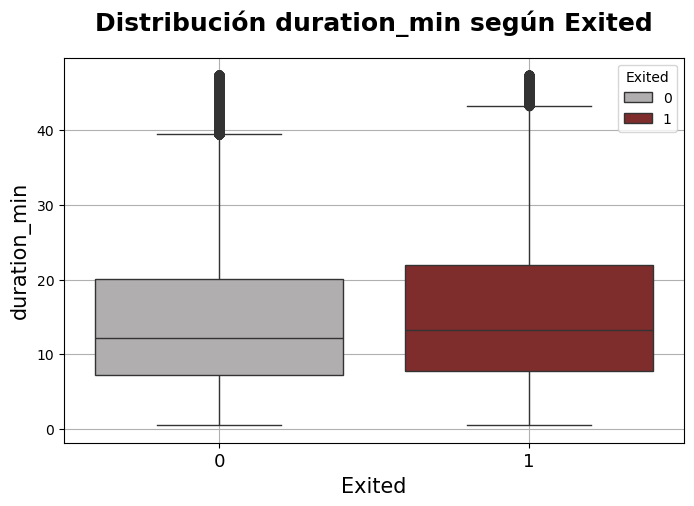

In [123]:
boxplot_ss_duration = boxplot_exited(df=df_ss_exited_no_outliers,
                                     ycol='duration_min',
                                     path=IMG_PATH)

### <font color='#FDD2A9'>**Observaciones: Duración promedio de sesión según Abandono**</font>

Lo que se puede observar a partir de este análisis a simple vista es contraintuitivo, ya que podríamos esperar que aquellos clientes que utilizan la aplicación por mayor tiempo presentan un mayor compromiso con la empresa (debido a mayor actividad).

Sin embargo, esta información es demasiado escasa para asumir algo así. Las sesiones más largas pueden deberse a fallos o alta latencia en la aplicación, lo cual implicaría que el tiempo pase más tiempo conectado sin necesariamente significar mayor compromiso, sino más bien, frustración.

## <font color='#8b1f1f'>**Conclusiones: Interacciones del cliente con la App**</font>

A partir de las observaciones en el comportamiento de ambos grupos (*Churners* y *No Churners*) en relación a la interacción con la aplicación, se visualizaron los siguientes aspectos:

* **Frecuencia de sesiones:**
  > Se observó una clara caida en la cantidad de sesiones iniciadas parece ser un fuerte indicador de que el cliente planea abandonar la empresa.
  > Se deberá monitorear el promedio de cada cliente y establecer un umbral que permita alertar si la cantidad habitual de sesiones de un cliente caen por debajo de este para tomar medidas preventivas.

* **Ratio de sesiones fallidas:**
  > Lo que capta la atención de este análisis es que, inicialmente, el ratio de sesiones fallidas en los clientes que permanecen en la empresa es más elevado que el de aquellos que decidieron abandonar. Sin embargo, este último grupo, presenta un pico considerablemente pronunciado en un lapso corto de tiempo.
  > Esto podría indicar que el cliente es más sensible a "la inestabilidad", que al fenómeno de sesiones fallidas en sí mismo.
  > Por lo que resultará primordial entender que es lo que genera dicha inestabilidad en el servicio, y mejorar la experiencia del usuario en relación a la aplicación. Si el presupuesto para esto no es elevado, es posible que buscar una solución media pero más estable, resulte mejor que una potente pero inestable.

* **Duración promedio de sesiones:**
  > Este análisis arrojó inicialmente algo que parece contradictorio: Los clientes que deciden irse son los que pasan mayor tiempo en la aplicación.
  > Sin embargo, esto podría reforzar lo planteado anteriormente, y ser a causa de problemas en el funcionamiento de la aplicación.

# <font color='#315aa0'>**Feature Engineering**</font>

## <font color='#c37171'>**Datasets Integration**</font>

A partir de los descubrimientos de la etapa de **Exploratory Data Analysis**, se buscará crear features para llevar las series temporales a un formato tabular y que de esta manera permitan captar patrones para predecir el Churn de clientes.

Para esto, se tomará un período de tiempo de análisis de 6 meses, en busca de predecir el **Churn** dentro de los próximos **3 meses**. Utilizando los valores previamente definidos:

* `CUTOFF_DATE = 2025-07-02` -> Ventana temporal de predicción
* `WINDOW_DATE = 2025-01-03` -> Ventana temporal de análisis

### <font color='#FCB53B'>**Transactions**</font>

In [124]:
df_tx_filtered = df_tx[(df_tx['date'] >= WINDOW_DATE) & (df_tx['date'] < CUTOFF_DATE)]

In [125]:
def safe_ratio(amount_1, amount_2):
    return np.log((amount_1 + 1) / (amount_2 + 1))

In [126]:
# Crea un DataFrame para los features
features_tx = df_tx_filtered.groupby('CustomerId').agg(
    avg_tx_amount=('amount', 'mean'),
    std_tx_amount=('amount', 'std'),
    total_tx=('amount', 'count'),
    last_tx_date=('date', 'max')
).reset_index()

In [127]:
features_tx

,CustomerId,avg_tx_amount,std_tx_amount,total_tx,last_tx_date
0,15565701,8866.888354,13934.162093,401,2025-07-01
1,15565706,10923.590769,17605.396953,26,2025-06-29
2,15565714,12754.688000,12690.105489,25,2025-06-28
3,15565779,12542.205349,18758.142539,172,2025-07-01
4,15565796,10597.507875,14776.764903,287,2025-07-01
...,...,...,...,...,...
9526,15815628,8984.825033,14150.694040,151,2025-07-01
9527,15815645,20757.688524,26882.739211,1179,2025-07-01
9528,15815656,20500.502956,26243.727173,450,2025-07-01
9529,15815660,7193.075294,9706.535101,34,2025-06-23


In [128]:
features_tx['days_since_last_tx'] = (CUTOFF_DATE - features_tx['last_tx_date']).dt.days

In [129]:

tx_past_30d = df_tx_filtered[df_tx_filtered['date'] >= CUTOFF_DATE - pd.Timedelta(days=30)]
tx_past_90d = df_tx_filtered[df_tx_filtered['date'] >= CUTOFF_DATE - pd.Timedelta(days=90)]

total_tx_past30d = tx_past_30d.groupby('CustomerId').size().reset_index(name='total_tx_past30d')
total_tx_past90d = tx_past_90d.groupby('CustomerId').size().reset_index(name='total_tx_past90d')

In [130]:
tx_first_90d = df_tx_filtered[df_tx_filtered['date'] < CUTOFF_DATE - pd.Timedelta(days=90)]

In [131]:
total_tx_first90d = tx_first_90d.groupby('CustomerId').size().reset_index(name='total_tx_first90d')

In [132]:
total_tx_past30d

,CustomerId,total_tx_past30d
0,15565701,78
1,15565706,3
2,15565714,5
3,15565779,36
4,15565796,57
...,...,...
9356,15815628,65
9357,15815645,195
9358,15815656,68
9359,15815660,3


In [133]:
features_tx = features_tx.merge(total_tx_past30d, on='CustomerId')
features_tx = features_tx.merge(total_tx_past90d, on='CustomerId')
features_tx = features_tx.merge(total_tx_first90d, on='CustomerId')

In [134]:
features_tx

,CustomerId,avg_tx_amount,std_tx_amount,total_tx,last_tx_date,days_since_last_tx,total_tx_past30d,total_tx_past90d,total_tx_first90d
0,15565701,8866.888354,13934.162093,401,2025-07-01,1,78,202,199
1,15565706,10923.590769,17605.396953,26,2025-06-29,3,3,18,8
2,15565714,12754.688000,12690.105489,25,2025-06-28,4,5,13,12
3,15565779,12542.205349,18758.142539,172,2025-07-01,1,36,88,84
4,15565796,10597.507875,14776.764903,287,2025-07-01,1,57,162,125
...,...,...,...,...,...,...,...,...,...
9327,15815626,20955.136667,21697.547291,90,2025-06-29,3,18,47,43
9328,15815645,20757.688524,26882.739211,1179,2025-07-01,1,195,560,619
9329,15815656,20500.502956,26243.727173,450,2025-07-01,1,68,209,241
9330,15815660,7193.075294,9706.535101,34,2025-06-23,9,3,9,25


In [135]:
df_clients['CustomerId'].nunique()

9640

In [136]:
un_ids = features_tx['CustomerId'].unique()

In [137]:
features_tx['tx_rate_of_change'] = (features_tx['total_tx_past90d'] - features_tx['total_tx_first90d']) / features_tx['total_tx_first90d']

In [138]:
features_tx

,CustomerId,avg_tx_amount,std_tx_amount,total_tx,last_tx_date,days_since_last_tx,total_tx_past30d,total_tx_past90d,total_tx_first90d,tx_rate_of_change
0,15565701,8866.888354,13934.162093,401,2025-07-01,1,78,202,199,0.015075
1,15565706,10923.590769,17605.396953,26,2025-06-29,3,3,18,8,1.250000
2,15565714,12754.688000,12690.105489,25,2025-06-28,4,5,13,12,0.083333
3,15565779,12542.205349,18758.142539,172,2025-07-01,1,36,88,84,0.047619
4,15565796,10597.507875,14776.764903,287,2025-07-01,1,57,162,125,0.296000
...,...,...,...,...,...,...,...,...,...,...
9327,15815626,20955.136667,21697.547291,90,2025-06-29,3,18,47,43,0.093023
9328,15815645,20757.688524,26882.739211,1179,2025-07-01,1,195,560,619,-0.095315
9329,15815656,20500.502956,26243.727173,450,2025-07-01,1,68,209,241,-0.132780
9330,15815660,7193.075294,9706.535101,34,2025-06-23,9,3,9,25,-0.640000


In [139]:
df_clients_filtered = df_clients[df_clients['CustomerId'].isin(un_ids)].copy()

In [140]:
consolidated_ds = df_clients_filtered.merge(features_tx, on='CustomerId')

### <font color='#FCB53B'>**App Interaction**</font>

In [141]:
df_ss_filtered = df_ss[(df_ss['date'] >= WINDOW_DATE) & (df_ss['date'] < CUTOFF_DATE)]

In [142]:
# Crea un DataFrame para los features
features_ss = df_ss_filtered.groupby('CustomerId').agg(
    avg_ss_duration=('duration_min', 'mean'),
    std_ss_duration=('duration_min', 'std'),
    total_ss=('duration_min', 'count'),
    last_ss_date=('date', 'max')
).reset_index()

In [143]:
features_ss['days_since_last_ss'] = (CUTOFF_DATE - features_ss['last_ss_date']).dt.days

In [144]:
ss_past_30d = df_ss_filtered[df_ss_filtered['date'] >= CUTOFF_DATE - pd.Timedelta(days=30)]
ss_past_90d = df_ss_filtered[df_ss_filtered['date'] >= CUTOFF_DATE - pd.Timedelta(days=90)]
ss_first_90d = df_ss_filtered[df_ss_filtered['date'] < CUTOFF_DATE - pd.Timedelta(days=90)]


total_ss_past30d = ss_past_30d.groupby('CustomerId').size().reset_index(name='total_ss_past30d')
total_ss_past90d = ss_past_90d.groupby('CustomerId').size().reset_index(name='total_ss_past90d')
total_ss_first90d = ss_first_90d.groupby('CustomerId').size().reset_index(name='total_ss_first90d')

total_failed_ss_past30d = ss_past_30d.groupby('CustomerId')['failed_login'].sum().reset_index(name='total_failed_ss_past30d')
total_failed_ss_past90d = ss_past_90d.groupby('CustomerId')['failed_login'].sum().reset_index(name='total_failed_ss_past90d')
total_failed_ss_first90d = ss_first_90d.groupby('CustomerId')['failed_login'].sum().reset_index(name='total_failed_ss_first90d')

In [145]:
features_ss

,CustomerId,avg_ss_duration,std_ss_duration,total_ss,last_ss_date,days_since_last_ss
0,15565701,20.049746,19.060689,31,2025-06-19,13
1,15565706,10.534496,10.506734,7,2025-06-25,7
2,15565714,22.178626,14.909457,30,2025-07-01,1
3,15565779,12.080178,9.805780,26,2025-06-26,6
4,15565796,23.362085,14.733555,39,2025-06-25,7
...,...,...,...,...,...,...
9563,15815628,12.358713,12.200382,23,2025-06-22,10
9564,15815645,30.950661,32.669428,66,2025-06-30,2
9565,15815656,35.160192,32.140871,66,2025-06-20,12
9566,15815660,9.807958,8.988792,16,2025-06-16,16


In [146]:
features_ss = features_ss.merge(total_ss_past30d, on='CustomerId')
features_ss = features_ss.merge(total_ss_past90d, on='CustomerId')
features_ss = features_ss.merge(total_ss_first90d, on='CustomerId')
features_ss = features_ss.merge(total_failed_ss_past30d, on='CustomerId')
features_ss = features_ss.merge(total_failed_ss_past90d, on='CustomerId')
features_ss = features_ss.merge(total_failed_ss_first90d, on='CustomerId')

In [147]:
features_ss

,CustomerId,avg_ss_duration,std_ss_duration,total_ss,last_ss_date,days_since_last_ss,total_ss_past30d,total_ss_past90d,total_ss_first90d,total_failed_ss_past30d,total_failed_ss_past90d,total_failed_ss_first90d
0,15565701,20.049746,19.060689,31,2025-06-19,13,4,14,17,0,2,0
1,15565706,10.534496,10.506734,7,2025-06-25,7,1,2,5,0,0,0
2,15565714,22.178626,14.909457,30,2025-07-01,1,6,16,14,0,0,1
3,15565779,12.080178,9.805780,26,2025-06-26,6,3,14,12,0,0,1
4,15565796,23.362085,14.733555,39,2025-06-25,7,6,20,19,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8604,15815628,12.358713,12.200382,23,2025-06-22,10,5,13,10,0,1,0
8605,15815645,30.950661,32.669428,66,2025-06-30,2,10,34,32,0,1,0
8606,15815656,35.160192,32.140871,66,2025-06-20,12,5,32,34,0,0,1
8607,15815660,9.807958,8.988792,16,2025-06-16,16,2,6,10,0,0,2


In [148]:
def calculate_session_change_rate(row):
    freq_past = row['total_ss_first90d']
    freq_last = row['total_ss_past90d']
    
    if freq_past == 0:
        if freq_last > 0:
            return 1.0  # O np.inf si prefieres un valor que represente infinito
        else:
            return 0.0
    else:
        return (freq_last - freq_past) / freq_past

In [149]:
features_ss['ss_change_rate'] = features_ss.apply(calculate_session_change_rate, axis=1)

In [150]:
def calculate_failed_login_ratio(row):
    total_failed = row['total_failed_ss_past90d']
    total_ss = row['total_ss_past90d']
    
    if total_ss == 0:
        return 0.0
    else:
        return total_failed / total_ss

In [151]:
features_ss['failed_login_ratio'] = features_ss.apply(calculate_failed_login_ratio, axis=1)

In [152]:
features_ss

,CustomerId,avg_ss_duration,std_ss_duration,total_ss,last_ss_date,days_since_last_ss,total_ss_past30d,total_ss_past90d,total_ss_first90d,total_failed_ss_past30d,total_failed_ss_past90d,total_failed_ss_first90d,ss_change_rate,failed_login_ratio
0,15565701,20.049746,19.060689,31,2025-06-19,13,4,14,17,0,2,0,-0.176471,0.142857
1,15565706,10.534496,10.506734,7,2025-06-25,7,1,2,5,0,0,0,-0.600000,0.000000
2,15565714,22.178626,14.909457,30,2025-07-01,1,6,16,14,0,0,1,0.142857,0.000000
3,15565779,12.080178,9.805780,26,2025-06-26,6,3,14,12,0,0,1,0.166667,0.000000
4,15565796,23.362085,14.733555,39,2025-06-25,7,6,20,19,0,0,1,0.052632,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,15815628,12.358713,12.200382,23,2025-06-22,10,5,13,10,0,1,0,0.300000,0.076923
8605,15815645,30.950661,32.669428,66,2025-06-30,2,10,34,32,0,1,0,0.062500,0.029412
8606,15815656,35.160192,32.140871,66,2025-06-20,12,5,32,34,0,0,1,-0.058824,0.000000
8607,15815660,9.807958,8.988792,16,2025-06-16,16,2,6,10,0,0,2,-0.400000,0.000000


In [153]:
uniques = features_ss['CustomerId'].unique()

In [154]:
consolidated_ds = consolidated_ds[consolidated_ds['CustomerId'].isin(uniques)].copy()

In [155]:
consolidated_ds = consolidated_ds.merge(features_ss, on='CustomerId')

In [156]:
consolidated_ds

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_label,vulnerability_tier,vulnerability_score,avg_tx_amount,std_tx_amount,total_tx,last_tx_date,days_since_last_tx,total_tx_past30d,total_tx_past90d,total_tx_first90d,tx_rate_of_change,avg_ss_duration,std_ss_duration,total_ss,last_ss_date,days_since_last_ss,total_ss_past30d,total_ss_past90d,total_ss_first90d,total_failed_ss_past30d,total_failed_ss_past90d,total_failed_ss_first90d,ss_change_rate,failed_login_ratio
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-08-15,Clientes potenciales,Medium,2,3596.782000,4823.976804,15,2025-06-26,6,3,8,7,0.142857,18.230805,14.026740,11,2025-06-29,3,1,2,9,0,0,0,-0.777778,0.0
1,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-27,VIP,Medium,2,17931.522786,21754.284442,646,2025-07-01,1,126,360,286,0.258741,32.363579,28.286246,52,2025-06-30,2,6,23,29,0,0,0,-0.206897,0.0
2,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Nuevos - Poco Valor,Medium,2,7931.855970,12467.222778,67,2025-07-01,1,13,38,29,0.310345,9.090539,4.638817,8,2025-06-13,19,2,3,5,0,0,0,-0.400000,0.0
3,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Standard,Medium,2,11650.896406,16434.252942,64,2025-07-01,1,13,32,32,0.000000,20.845499,15.098533,23,2025-06-29,3,8,13,10,0,0,0,0.300000,0.0
4,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,2025-09-12,VIP,Medium,2,18692.423795,23921.874843,390,2025-07-01,1,54,168,222,-0.243243,29.772224,29.084442,57,2025-06-29,3,5,22,35,0,0,0,-0.371429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0,NaT,Clientes potenciales,Low,1,7016.565094,10141.596265,53,2025-07-01,1,7,16,37,-0.567568,14.175758,13.880538,20,2025-06-30,2,3,12,8,0,0,0,0.500000,0.0
8404,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NaT,Clientes potenciales,Medium,2,11055.175985,17838.128714,137,2025-07-01,1,30,74,63,0.174603,11.172036,8.111778,28,2025-06-20,12,3,15,13,0,0,2,0.153846,0.0
8405,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,NaT,Valioso - Bajo compromiso,Medium,2,8885.047652,12315.935802,379,2025-07-01,1,64,175,204,-0.142157,16.210825,11.192567,34,2025-06-30,2,5,14,20,0,0,1,-0.300000,0.0
8406,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2025-09-03,Nuevos - Poco Valor,Medium,2,10506.813670,19535.082242,218,2025-06-29,3,39,107,111,-0.036036,5.926375,4.854074,5,2025-06-18,14,1,1,4,0,0,0,-0.750000,0.0


In [157]:
consolidated_ds = consolidated_ds[
    ((consolidated_ds['Exited'] == 1) & (consolidated_ds['ExitDate'] > CUTOFF_DATE)) |
    (consolidated_ds['Exited'] == 0)]

In [158]:
consolidated_ds

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_label,vulnerability_tier,vulnerability_score,avg_tx_amount,std_tx_amount,total_tx,last_tx_date,days_since_last_tx,total_tx_past30d,total_tx_past90d,total_tx_first90d,tx_rate_of_change,avg_ss_duration,std_ss_duration,total_ss,last_ss_date,days_since_last_ss,total_ss_past30d,total_ss_past90d,total_ss_first90d,total_failed_ss_past30d,total_failed_ss_past90d,total_failed_ss_first90d,ss_change_rate,failed_login_ratio
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-08-15,Clientes potenciales,Medium,2,3596.782000,4823.976804,15,2025-06-26,6,3,8,7,0.142857,18.230805,14.026740,11,2025-06-29,3,1,2,9,0,0,0,-0.777778,0.0
1,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-27,VIP,Medium,2,17931.522786,21754.284442,646,2025-07-01,1,126,360,286,0.258741,32.363579,28.286246,52,2025-06-30,2,6,23,29,0,0,0,-0.206897,0.0
2,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Nuevos - Poco Valor,Medium,2,7931.855970,12467.222778,67,2025-07-01,1,13,38,29,0.310345,9.090539,4.638817,8,2025-06-13,19,2,3,5,0,0,0,-0.400000,0.0
3,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Standard,Medium,2,11650.896406,16434.252942,64,2025-07-01,1,13,32,32,0.000000,20.845499,15.098533,23,2025-06-29,3,8,13,10,0,0,0,0.300000,0.0
4,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,2025-09-12,VIP,Medium,2,18692.423795,23921.874843,390,2025-07-01,1,54,168,222,-0.243243,29.772224,29.084442,57,2025-06-29,3,5,22,35,0,0,0,-0.371429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0,NaT,Clientes potenciales,Low,1,7016.565094,10141.596265,53,2025-07-01,1,7,16,37,-0.567568,14.175758,13.880538,20,2025-06-30,2,3,12,8,0,0,0,0.500000,0.0
8404,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,NaT,Clientes potenciales,Medium,2,11055.175985,17838.128714,137,2025-07-01,1,30,74,63,0.174603,11.172036,8.111778,28,2025-06-20,12,3,15,13,0,0,2,0.153846,0.0
8405,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,NaT,Valioso - Bajo compromiso,Medium,2,8885.047652,12315.935802,379,2025-07-01,1,64,175,204,-0.142157,16.210825,11.192567,34,2025-06-30,2,5,14,20,0,0,1,-0.300000,0.0
8406,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,2025-09-03,Nuevos - Poco Valor,Medium,2,10506.813670,19535.082242,218,2025-06-29,3,39,107,111,-0.036036,5.926375,4.854074,5,2025-06-18,14,1,1,4,0,0,0,-0.750000,0.0


In [159]:
consolidated_ds.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'ExitDate', 'cluster_label',
       'vulnerability_tier', 'vulnerability_score', 'avg_tx_amount',
       'std_tx_amount', 'total_tx', 'last_tx_date', 'days_since_last_tx',
       'total_tx_past30d', 'total_tx_past90d', 'total_tx_first90d',
       'tx_rate_of_change', 'avg_ss_duration', 'std_ss_duration', 'total_ss',
       'last_ss_date', 'days_since_last_ss', 'total_ss_past30d',
       'total_ss_past90d', 'total_ss_first90d', 'total_failed_ss_past30d',
       'total_failed_ss_past90d', 'total_failed_ss_first90d', 'ss_change_rate',
       'failed_login_ratio'],
      dtype='object')

In [160]:
consolidated_ds.drop(['ExitDate', 'cluster_label', 'vulnerability_tier', 
                      'vulnerability_score', 'last_tx_date', 'last_ss_date'], 
                    axis=1,
                    inplace=True)

In [161]:
consolidated_ds

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,avg_tx_amount,std_tx_amount,total_tx,days_since_last_tx,total_tx_past30d,total_tx_past90d,total_tx_first90d,tx_rate_of_change,avg_ss_duration,std_ss_duration,total_ss,days_since_last_ss,total_ss_past30d,total_ss_past90d,total_ss_first90d,total_failed_ss_past30d,total_failed_ss_past90d,total_failed_ss_first90d,ss_change_rate,failed_login_ratio
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3596.782000,4823.976804,15,6,3,8,7,0.142857,18.230805,14.026740,11,3,1,2,9,0,0,0,-0.777778,0.0
1,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,17931.522786,21754.284442,646,1,126,360,286,0.258741,32.363579,28.286246,52,2,6,23,29,0,0,0,-0.206897,0.0
2,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,7931.855970,12467.222778,67,1,13,38,29,0.310345,9.090539,4.638817,8,19,2,3,5,0,0,0,-0.400000,0.0
3,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,11650.896406,16434.252942,64,1,13,32,32,0.000000,20.845499,15.098533,23,3,8,13,10,0,0,0,0.300000,0.0
4,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,18692.423795,23921.874843,390,1,54,168,222,-0.243243,29.772224,29.084442,57,3,5,22,35,0,0,0,-0.371429,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0,7016.565094,10141.596265,53,1,7,16,37,-0.567568,14.175758,13.880538,20,2,3,12,8,0,0,0,0.500000,0.0
8404,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,11055.175985,17838.128714,137,1,30,74,63,0.174603,11.172036,8.111778,28,12,3,15,13,0,0,2,0.153846,0.0
8405,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,8885.047652,12315.935802,379,1,64,175,204,-0.142157,16.210825,11.192567,34,2,5,14,20,0,0,1,-0.300000,0.0
8406,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,10506.813670,19535.082242,218,3,39,107,111,-0.036036,5.926375,4.854074,5,14,1,1,4,0,0,0,-0.750000,0.0


In [162]:
consolidated_ds.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'avg_tx_amount', 'std_tx_amount',
       'total_tx', 'days_since_last_tx', 'total_tx_past30d',
       'total_tx_past90d', 'total_tx_first90d', 'tx_rate_of_change',
       'avg_ss_duration', 'std_ss_duration', 'total_ss', 'days_since_last_ss',
       'total_ss_past30d', 'total_ss_past90d', 'total_ss_first90d',
       'total_failed_ss_past30d', 'total_failed_ss_past90d',
       'total_failed_ss_first90d', 'ss_change_rate', 'failed_login_ratio'],
      dtype='object')

In [163]:
col_order =['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'avg_tx_amount', 'std_tx_amount',
       'total_tx', 'days_since_last_tx', 'total_tx_past30d',
       'total_tx_past90d', 'total_tx_first90d', 'tx_rate_of_change',
       'avg_ss_duration', 'std_ss_duration', 'total_ss', 'days_since_last_ss',
       'total_ss_past30d', 'total_ss_past90d', 'total_ss_first90d',
       'total_failed_ss_past30d', 'total_failed_ss_past90d',
       'total_failed_ss_first90d', 'ss_change_rate', 'failed_login_ratio', 'Exited']

consolidated_ds = consolidated_ds[col_order]

## <font color='#c37171'>**Variance Inflation Factor (VIF)**</font>

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import RobustScaler

In [165]:
df_vif = consolidated_ds.copy()

In [166]:
df_vif.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'avg_tx_amount', 'std_tx_amount', 'total_tx',
       'days_since_last_tx', 'total_tx_past30d', 'total_tx_past90d',
       'total_tx_first90d', 'tx_rate_of_change', 'avg_ss_duration',
       'std_ss_duration', 'total_ss', 'days_since_last_ss', 'total_ss_past30d',
       'total_ss_past90d', 'total_ss_first90d', 'total_failed_ss_past30d',
       'total_failed_ss_past90d', 'total_failed_ss_first90d', 'ss_change_rate',
       'failed_login_ratio', 'Exited'],
      dtype='object')

In [167]:
df_vif.drop(['CustomerId','Geography', 'Gender', 'total_tx','total_tx_past90d',
             'total_tx_first90d', 'total_ss', 'Exited'], 
            axis=1, inplace=True)

In [168]:
vif_robust_scaler = RobustScaler()

In [169]:
columnas_df_vif = df_vif.columns
len(columnas_df_vif)

24

In [170]:
columnas_df_vif

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'avg_tx_amount', 'std_tx_amount',
       'days_since_last_tx', 'total_tx_past30d', 'tx_rate_of_change',
       'avg_ss_duration', 'std_ss_duration', 'days_since_last_ss',
       'total_ss_past30d', 'total_ss_past90d', 'total_ss_first90d',
       'total_failed_ss_past30d', 'total_failed_ss_past90d',
       'total_failed_ss_first90d', 'ss_change_rate', 'failed_login_ratio'],
      dtype='object')

In [171]:
X_vif = vif_robust_scaler.fit_transform(df_vif)
df_vif[columnas_df_vif] = X_vif
df_vif

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,avg_tx_amount,std_tx_amount,days_since_last_tx,total_tx_past30d,tx_rate_of_change,avg_ss_duration,std_ss_duration,days_since_last_ss,total_ss_past30d,total_ss_past90d,total_ss_first90d,total_failed_ss_past30d,total_failed_ss_past90d,total_failed_ss_first90d,ss_change_rate,failed_login_ratio
0,-0.244444,0.416667,-0.6,-0.759426,-1.0,0.0,0.0,-0.000114,-2.161622,-1.869681,5.0,-0.75000,0.209379,0.139338,0.087426,-0.375,-0.75,-1.250,-0.500,0.0,0.0,0.0,-1.206854,0.0
1,-1.111111,0.416667,0.6,0.490590,1.0,0.0,-1.0,0.129379,2.367663,0.727989,0.0,3.09375,0.635975,1.786199,1.450604,-0.500,0.50,1.375,2.000,0.0,0.0,0.0,-0.279172,0.0
2,0.348148,0.166667,-0.8,-0.759426,0.0,-1.0,-1.0,-0.077528,-0.791888,-0.696954,0.0,-0.43750,0.825940,-0.925758,-0.810039,1.625,-0.50,-1.125,-1.000,0.0,0.0,0.0,-0.592965,0.0
3,1.466667,0.500000,-0.6,0.223223,-1.0,0.0,0.0,-0.229249,0.383201,-0.088280,0.0,-0.43750,-0.316510,0.444022,0.189887,-0.375,1.00,0.125,-0.375,0.0,0.0,0.0,0.544535,0.0
4,-0.051852,0.583333,0.6,0.131190,0.0,0.0,-1.0,0.498067,2.608081,1.060569,0.0,0.84375,-1.211943,1.484234,1.526910,-0.375,0.25,1.250,2.750,0.0,0.0,0.0,-0.546536,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,1.096296,-0.666667,-0.6,-0.759426,0.0,-1.0,-1.0,0.683485,-1.081088,-1.053782,0.0,-0.62500,-2.405855,-0.333188,0.073449,-0.500,-0.25,0.000,-0.625,0.0,0.0,0.0,0.869535,0.0
8404,0.881481,0.166667,0.0,-0.759426,0.0,0.0,-1.0,-0.052376,0.194974,0.127121,0.0,0.09375,0.326244,-0.683206,-0.478032,0.750,-0.25,0.375,0.000,0.0,0.0,2.0,0.307035,0.0
8405,-1.007407,-0.166667,1.0,-0.310268,-1.0,0.0,0.0,0.003497,-0.490712,-0.720166,0.0,1.15625,-0.839822,-0.096046,-0.183515,-0.500,0.25,0.250,0.875,0.0,0.0,1.0,-0.430465,0.0
8406,0.422222,-0.083333,0.4,-0.759426,-1.0,-1.0,0.0,-0.610013,0.021710,0.387490,2.0,0.37500,-0.449167,-1.294471,-0.789461,1.000,-0.75,-1.375,-1.125,0.0,0.0,0.0,-1.161715,0.0


In [172]:
features = columnas_df_vif

In [173]:
df_vif = df_vif[features].fillna(0)

In [174]:
df_vif_1 = pd.DataFrame()
df_vif_1['Feature'] = features
df_vif_1['VIF'] = [vif(df_vif[features], i) for i in range(len(features))]

In [175]:
df_vif_1.sort_values('VIF', ascending=False)

,Feature,VIF
13,avg_ss_duration,8.114809
20,total_failed_ss_past90d,6.694587
8,avg_tx_amount,6.623368
14,std_ss_duration,6.181724
23,failed_login_ratio,5.644037
17,total_ss_past90d,4.920636
18,total_ss_first90d,4.103410
9,std_tx_amount,3.918148
16,total_ss_past30d,2.872041
11,total_tx_past30d,2.147947


In [176]:
features

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'avg_tx_amount', 'std_tx_amount',
       'days_since_last_tx', 'total_tx_past30d', 'tx_rate_of_change',
       'avg_ss_duration', 'std_ss_duration', 'days_since_last_ss',
       'total_ss_past30d', 'total_ss_past90d', 'total_ss_first90d',
       'total_failed_ss_past30d', 'total_failed_ss_past90d',
       'total_failed_ss_first90d', 'ss_change_rate', 'failed_login_ratio'],
      dtype='object')

In [181]:
features = ['CustomerId','CreditScore', 'Geography', 'Gender',  'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'avg_tx_amount', 'std_tx_amount',
       'days_since_last_tx', 'total_tx_past30d', 'tx_rate_of_change',
       'avg_ss_duration', 'std_ss_duration', 'days_since_last_ss',
       'total_ss_past30d', 'total_ss_past90d', 'total_ss_first90d',
       'total_failed_ss_past30d', 'total_failed_ss_past90d',
       'total_failed_ss_first90d', 'ss_change_rate', 'failed_login_ratio', 'Exited']

In [182]:
ds_ml = consolidated_ds[features]

In [183]:
ds_ml

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,avg_tx_amount,std_tx_amount,days_since_last_tx,total_tx_past30d,tx_rate_of_change,avg_ss_duration,std_ss_duration,days_since_last_ss,total_ss_past30d,total_ss_past90d,total_ss_first90d,total_failed_ss_past30d,total_failed_ss_past90d,total_failed_ss_first90d,ss_change_rate,failed_login_ratio,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,3596.782000,4823.976804,6,3,0.142857,18.230805,14.026740,3,1,2,9,0,0,0,-0.777778,0.0,1
1,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,17931.522786,21754.284442,1,126,0.258741,32.363579,28.286246,2,6,23,29,0,0,0,-0.206897,0.0,1
2,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,7931.855970,12467.222778,1,13,0.310345,9.090539,4.638817,19,2,3,5,0,0,0,-0.400000,0.0,0
3,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,11650.896406,16434.252942,1,13,0.000000,20.845499,15.098533,3,8,13,10,0,0,0,0.300000,0.0,0
4,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,18692.423795,23921.874843,1,54,-0.243243,29.772224,29.084442,3,5,22,35,0,0,0,-0.371429,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,7016.565094,10141.596265,1,7,-0.567568,14.175758,13.880538,2,3,12,8,0,0,0,0.500000,0.0,0
8404,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,11055.175985,17838.128714,1,30,0.174603,11.172036,8.111778,12,3,15,13,0,0,2,0.153846,0.0,0
8405,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,8885.047652,12315.935802,1,64,-0.142157,16.210825,11.192567,2,5,14,20,0,0,1,-0.300000,0.0,0
8406,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,10506.813670,19535.082242,3,39,-0.036036,5.926375,4.854074,14,1,1,4,0,0,0,-0.750000,0.0,1


In [184]:
ds_ml.to_csv(DATA_PATH / 'ml_dataset.csv', index=False)